# Ready for the dataset

In [220]:
# Prepare the dataset-importing the libraries.

import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
       print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [221]:
# Hide warnings
import warnings
warnings.filterwarnings('ignore')

In [222]:
#importing the dataset, read data from survey
dataset = pd.read_csv('survey_results_public.csv', encoding='cp949')

dataset

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I?셫 not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

# Basic data analysis

Using methods from DataFrame and analysis the columns (head(), info(), describe())

In [223]:
dataset.head()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
0,1,I am a developer by profession,Yes,NaN,13,Monthly,NaN,NaN,Germany,European Euro,EUR,Microsoft SQL Server,Elasticsearch;Microsoft SQL Server;Oracle,"Developer, desktop or enterprise applications;...","Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Independent contractor, freelancer, or self-em...",White or of European descent,Man,"Languages, frameworks, and other technologies ...",Slightly satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript,C#;HTML/CSS;JavaScript,.NET Core;Xamarin,.NET;.NET Core,Microsoft Teams;Microsoft Azure;Trello,Confluence;Jira;Slack;Microsoft Azure;Trello,No,Somewhat important,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,Often: 1-2 days per week or more,Start a free trial;Ask developers I know/work ...,Amused,Stack Overflow (public Q&A for anyone who codes),Visit Stack Overflow;Go for a walk or other ph...,Windows,2 to 9 employees,Android;iOS;Kubernetes;Microsoft Azure;Windows,Windows,NaN,Straight / Heterosexual,No,"No, not at all",NaN,Multiple times per day,Neither easy nor difficult,Appropriate in length,No,"Computer science, computer engineering, or sof...",ASP.NET Core,ASP.NET;ASP.NET Core,Just as welcome now as I felt last year,50.0,36,27
1,2,I am a developer by profession,No,NaN,19,NaN,NaN,NaN,United Kingdom,Pound sterling,GBP,NaN,NaN,"Developer, full-stack;Developer, mobile","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)",Employed full-time,NaN,NaN,NaN,Very dissatisfied,I am not interested in new job opportunities,Python;Swift,JavaScript;Swift,React Native;TensorFlow;Unity 3D,React Native,Github;Slack,Confluence;Jira;Github;Gitlab;Slack,NaN,NaN,Fairly important,NaN,NaN,Once a year,Not sure,NaN,No,NaN,NaN,Amused,Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,MacOS,"1,000 to 4,999 employees",iOS;Kubernetes;Linux;MacOS,iOS,I have little or no influence,NaN,Yes,"Yes, definitely",Less than once per month or monthly,Multiple times per day,NaN,NaN,NaN,"Computer science, computer engineering, or sof...",NaN,NaN,Somewhat more welcome now than last year,NaN,7,4
2,3,I code primarily as a hobby,Yes,NaN,15,NaN,NaN,NaN,Russian Federation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Objective-C;Python;Swift,Objective-C;Python;Swift,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Once a decade,NaN,NaN,No,NaN,NaN,NaN,Stack Overflow (public Q&A for anyone who codes),NaN,Linux-based,NaN,NaN,NaN,NaN,NaN,Yes,"Yes, somewhat",A few times per month or weekly,Daily or almost daily,Neither easy nor difficult,Appropriate in length,NaN,NaN,NaN,NaN,Somewhat more welcome now than last year,NaN,4,NaN
3,4,I am a developer by profession,Yes,25.0,18,NaN,NaN,NaN,Albania,Albanian lek,ALL,NaN,NaN,NaN,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,White or of European descent,Man,Flex time or a flexible schedule;Office enviro...,Slightly dissatisfied,"I?셫 not actively looking, but I am open to new...",NaN,NaN,NaN,NaN,NaN,NaN,No,NaN,Not at all important/not necessary,Curious about other opportunities;Wanting to w...,NaN,Once a year,Not sure,Yes,Yes,Occasionally: 1-2 days per quarter but less th...,NaN,NaN,Stack Overflow (public Q&A for anyone who code...,NaN,Lin

In [224]:
dataset.columns

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Age', 'Age1stCode', 'CompFreq',
       'CompTotal', 'ConvertedComp', 'Country', 'CurrencyDesc',
       'CurrencySymbol', 'DatabaseDesireNextYear', 'DatabaseWorkedWith',
       'DevType', 'EdLevel', 'Employment', 'Ethnicity', 'Gender', 'JobFactors',
       'JobSat', 'JobSeek', 'LanguageDesireNextYear', 'LanguageWorkedWith',
       'MiscTechDesireNextYear', 'MiscTechWorkedWith',
       'NEWCollabToolsDesireNextYear', 'NEWCollabToolsWorkedWith', 'NEWDevOps',
       'NEWDevOpsImpt', 'NEWEdImpt', 'NEWJobHunt', 'NEWJobHuntResearch',
       'NEWLearn', 'NEWOffTopic', 'NEWOnboardGood', 'NEWOtherComms',
       'NEWOvertime', 'NEWPurchaseResearch', 'NEWPurpleLink', 'NEWSOSites',
       'NEWStuck', 'OpSys', 'OrgSize', 'PlatformDesireNextYear',
       'PlatformWorkedWith', 'PurchaseWhat', 'Sexuality', 'SOAccount',
       'SOComm', 'SOPartFreq', 'SOVisitFreq', 'SurveyEase', 'SurveyLength',
       'Trans', 'UndergradMajor', 'WebframeDesireNextYear',
  

In [225]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64461 entries, 0 to 64460
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Respondent                    64461 non-null  int64  
 1   MainBranch                    64162 non-null  object 
 2   Hobbyist                      64416 non-null  object 
 3   Age                           45446 non-null  float64
 4   Age1stCode                    57900 non-null  object 
 5   CompFreq                      40069 non-null  object 
 6   CompTotal                     34826 non-null  float64
 7   ConvertedComp                 34756 non-null  float64
 8   Country                       64072 non-null  object 
 9   CurrencyDesc                  45472 non-null  object 
 10  CurrencySymbol                45472 non-null  object 
 11  DatabaseDesireNextYear        44070 non-null  object 
 12  DatabaseWorkedWith            49537 non-null  object 
 13  D

In [226]:
dataset.shape

(64461, 61)

In [227]:
# To check is there any outliers values: Age/ WorkWeekHrs --> Outliers values! 
# --> We can see some obvious outliers like Age 279 age & working 475 h/w. For a better accuracy, these outliers should be illuminated.
dataset.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,64461.000000,45446.000000,3.482600e+04,3.475600e+04,41151.000000
mean,32554.079738,30.834111,3.187274e+242,1.037561e+05,40.782174
std,18967.442360,9.585392,inf,2.268853e+05,17.816383
min,1.000000,1.000000,0.000000e+00,0.000000e+00,1.000000
25%,16116.000000,24.000000,2.000000e+04,2.464800e+04,40.000000
50%,32231.000000,29.000000,6.300000e+04,5.404900e+04,40.000000
75%,49142.000000,35.000000,1.250000e+05,9.500000e+04,44.000000
max,65639.000000,279.000000,1.110000e+247,2.000000e+06,475.000000


# Remove outliers values

In [228]:
# Remove WorkWeekHrs outliers values.

dataset["WorkWeekHrs"]= dataset["WorkWeekHrs"][dataset["WorkWeekHrs"].between(dataset["WorkWeekHrs"].mean(), 
                                                                              dataset["WorkWeekHrs"].quantile(.85)+20)]

In [229]:
notOutlier = dataset['WorkWeekHrs'] < 100
dataset = dataset[notOutlier]
dataset['WorkWeekHrs'] = dataset['WorkWeekHrs'].astype(int)

In [230]:
dataset["WorkWeekHrs"].value_counts()

45    3789
50    2748
42    1016
60    1010
48     603
44     486
55     382
43     290
41     199
46     106
56      85
47      83
54      81
65      62
52      53
63      28
49      23
58      14
51      12
53       7
57       7
62       7
64       6
59       3
61       2
Name: WorkWeekHrs, dtype: int64

# Remove missing values

In [231]:
# Check the missing values
dataset.isnull().sum()

Respondent               0
MainBranch               0
Hobbyist                 0
Age                   1733
Age1stCode              35
                      ... 
WebframeWorkedWith    2856
WelcomeChange          944
WorkWeekHrs              0
YearsCode               62
YearsCodePro            74
Length: 61, dtype: int64

In [232]:
# Drop the values '0' with 61 columns
dataset.dropna(inplace=True)
print(dataset.shape)
dataset.head(20)

(1223, 61)


,Respondent,MainBranch,Hobbyist,Age,Age1stCode,CompFreq,CompTotal,ConvertedComp,Country,CurrencyDesc,CurrencySymbol,DatabaseDesireNextYear,DatabaseWorkedWith,DevType,EdLevel,Employment,Ethnicity,Gender,JobFactors,JobSat,JobSeek,LanguageDesireNextYear,LanguageWorkedWith,MiscTechDesireNextYear,MiscTechWorkedWith,NEWCollabToolsDesireNextYear,NEWCollabToolsWorkedWith,NEWDevOps,NEWDevOpsImpt,NEWEdImpt,NEWJobHunt,NEWJobHuntResearch,NEWLearn,NEWOffTopic,NEWOnboardGood,NEWOtherComms,NEWOvertime,NEWPurchaseResearch,NEWPurpleLink,NEWSOSites,NEWStuck,OpSys,OrgSize,PlatformDesireNextYear,PlatformWorkedWith,PurchaseWhat,Sexuality,SOAccount,SOComm,SOPartFreq,SOVisitFreq,SurveyEase,SurveyLength,Trans,UndergradMajor,WebframeDesireNextYear,WebframeWorkedWith,WelcomeChange,WorkWeekHrs,YearsCode,YearsCodePro
117,119,I am a developer by profession,Yes,35.0,15,Yearly,145000.0,145000.0,United States,United States dollar,USD,Redis,DynamoDB;MariaDB;PostgreSQL,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,Flex time or a flexible schedule;How widely us...,Very satisfied,"I?셫 not actively looking, but I am open to new...",Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,.NET Core;Teraform,.NET Core;Node.js;Teraform;Unity 3D;Unreal Engine,Github;Microsoft Azure,Confluence;Jira;Github;Gitlab;Microsoft Azure;...,Yes,Extremely important,Very important,Better compensation;Trouble with leadership at...,"Read company media, such as employee blogs or ...",Once every few years,No,Yes,Yes,Often: 1-2 days per week or more,Ask developers I know/work with,Annoyed,Stack Overflow (public Q&A for anyone who code...,Meditate;Call a coworker or friend;Visit Stack...,Windows,2 to 9 employees,Docker;Kubernetes;Linux;MacOS;Microsoft Azure;...,Android;AWS;Docker;iOS;Kubernetes;Linux;MacOS;...,I have some influence,Straight / Heterosexual,Yes,"Yes, somewhat",A few times per week,Multiple times per day,Easy,Appropriate in length,No,"Another engineering discipline (such as civil,...",ASP.NET Core;Gatsby;React.js,ASP.NET Core;React.js,Just as welcome now as I felt last year,50,16,16
168,170,I am a developer by profession,Yes,26.0,17,Yearly,130000.0,130000.0,United States,United States dollar,USD,MySQL;PostgreSQL;Redis,Elasticsearch;Firebase;MySQL;PostgreSQL;SQLite,Data scientist or machine learning specialist;...,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)",Employed full-time,White or of European descent,Man,"Languages, frameworks, and other technologies ...",Very satisfied,I am not interested in new job opportunities,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,C#;HTML/CSS;JavaScript;PHP;Python;SQL,.NET;Keras;Node.js;Pandas;React Native;TensorF...,.NET;Keras;Node.js;Pandas;React Native;TensorF...,Jira;Github;Gitlab;Microsoft Azure,Github;Gitlab;Facebook Workplace,Yes,Extremely important,Not at all important/not necessary,Having a bad day (or week or month) at work;Wa...,"Read company media, such as employee blogs or ...",Every few months,No,Yes,No,Sometimes: 1-2 days per month but less than we...,Start a free trial;Ask developers I know/work ...,"Hello, old friend",Stack Overflow (public Q&A for anyone who code...,Visit Stack Overflow;Go for a walk or other ph...,Linux-based,20 to 99 employees,Android;Arduino;AWS;Docker;Kubernetes;Linux;Ra...,Android;Arduino;AWS;Docker;Heroku;Linux;Windows,I have a great deal of influence,Straight / Heterosexual,Yes,"No, not really",I have never participated in Q&A on Stack Over...,Daily or almost daily,Easy,Appropriate in length,No,"A humanities discipline (such as literature, h...",Django;Express;Flask;jQuery;Laravel;React.js,Django;Express;Flask;jQuery;React.js,Just as welcome now as I felt last year,45,4,2
198,200,I am a developer by profession,No,53.0,9,Yearly,105000.0,105000.0,United States,United States dollar,USD,Microsoft SQL Server;MySQL;Redis,Microsoft SQL Server;MySQL,"Deve

# Check duplicated values

In [233]:
dataset.duplicated().sum()

0

In [234]:
dataset.describe()

,Respondent,Age,CompTotal,ConvertedComp,WorkWeekHrs
count,1223.000000,1223.000000,1.223000e+03,1.223000e+03,1223.000000
mean,28705.258381,32.686836,2.968122e+06,1.239938e+05,48.083401
std,18693.074078,7.791948,2.880840e+07,2.753329e+05,5.253126
min,119.000000,18.000000,0.000000e+00,0.000000e+00,41.000000
25%,12298.500000,27.000000,3.635000e+04,2.470500e+04,45.000000
50%,26555.000000,31.000000,9.500000e+04,6.754800e+04,45.000000
75%,47324.000000,37.000000,1.600000e+05,1.200000e+05,50.000000
max,62904.000000,61.000000,9.000000e+08,2.000000e+06,65.000000


In [235]:
dataset.shape

(1223, 61)

# Show the dataset and choose the features

In [236]:
# Select features: View columns which seem like related with salary

columns = ['Respondent','MainBranch', 'Hobbyist', 'Gender', 'Age', 'Age1stCode','YearsCode', 'YearsCodePro','DevType',
            'EdLevel','UndergradMajor','ConvertedComp', 'WorkWeekHrs',
           'Country', 'Ethnicity',                     
           'LanguageDesireNextYear', 'LanguageWorkedWith', 'NEWLearn','NEWOvertime', 'JobSat']

dataset =pd.DataFrame (dataset, columns= columns)
print(dataset.shape)
dataset.head (10)

(1223, 20)


,Respondent,MainBranch,Hobbyist,Gender,Age,Age1stCode,YearsCode,YearsCodePro,DevType,EdLevel,UndergradMajor,ConvertedComp,WorkWeekHrs,Country,Ethnicity,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWOvertime,JobSat
117,119,I am a developer by profession,Yes,Man,35.0,15,16,16,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",145000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,Once every few years,Often: 1-2 days per week or more,Very satisfied
168,170,I am a developer by profession,Yes,Man,26.0,17,4,2,Data scientist or machine learning specialist;...,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",130000.0,45,United States,White or of European descent,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,Very satisfied
198,200,I am a developer by profession,No,Man,53.0,9,44,32,"Developer, back-end;Developer, desktop or ente...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",105000.0,44,United States,White or of European descent,C#;C++;Go;HTML/CSS;JavaScript;Kotlin;Objective...,C#;C++;HTML/CSS;JavaScript;Python;SQL,Once a year,Occasionally: 1-2 days per quarter but less th...,Very satisfied
240,242,I am a developer by profession,Yes,Man,37.0,11,22,3,"Developer, back-end;Developer, front-end;Devel...","Professional degree (JD, MD, etc.)","A social science (such as anthropology, psycho...",87552.0,42,Israel,Middle Eastern,JavaScript;Python;Ruby,HTML/CSS;JavaScript;Ruby,Every few months,Occasionally: 1-2 days per quarter but less th...,Very satisfied
260,262,I am a developer by profession,Yes,Man,37.0,10,10,10,Data or business analyst;Data scientist or mac...,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",171000.0,45,United States,White or of European descent,Bash/Shell/PowerShell;Go;JavaScript;Python;SQL,Bash/Shell/PowerShell;Haskell;HTML/CSS;JavaScr...,Once every few years,Sometimes: 1-2 days per month but less than we...,Very satisfied
282,284,I am a developer by profession,Yes,Man,28.0,18,7,3,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",27888.0,45,Greece,White or of European descent,Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScr...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Py...,Once a year,Sometimes: 1-2 days per month but less than we...,Very satisfied
305,307,I am a developer by profession,Yes,Man,41.0,14,24,19,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",648588.0,45,Ireland,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,Very satisfied
431,433,I am a developer by profession,Yes,Man,24.0,12,11,3,"Developer, front-end;Developer, full-stack;Dev...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",9564.0,50,Sri Lanka,South Asian,Go;Kotlin,Bash/Shell/PowerShell;C;C#;C++;Dart;HTML/CSS;J...,Once a year,Sometimes: 1-2 days per month but less than we...,Slightly satisfied
461,463,I am a developer by profession,Yes,Man,43.0,15,28,20,"Database administrator;Developer, back-end;Dev...","Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",154000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Once a year,Often: 1-2 days per week or more,Slightly satisfied
485,487,I am a developer by pr

# Preprocessing - Replace all (unsual) attributes 

In [237]:
print(dataset['YearsCodePro'].unique())

['16' '2' '32' '3' '10' '19' '20' '13' '24' '7' '25' '17' '11' '9' '5'
 '23' '26' '15' '8' '22' '21' '4' '14' 'Less than 1 year' '12' '30' '33'
 '6' '38' '28' '18' '35' '1' '31' '27' '29' '36' '37']


In [238]:
dataset['YearsCodePro'].replace(to_replace=['More than 50 year', 'Less than 1 year'], value=np.nan, regex=True, inplace=True)

In [239]:
print(dataset['Age1stCode'].unique())

['15' '17' '9' '11' '10' '18' '14' '12' '23' 'Younger than 5 years' '16'
 '19' '8' '32' '6' '22' '7' '21' '13' '20' '24' '5' '25' '31' '29' '27'
 '26' '38' '30' '28']


In [240]:
dataset['Age1stCode'].replace(to_replace=['Younger than 5 years'], value=np.nan, regex=True, inplace=True)

In [241]:
print(dataset['Gender'].unique())

['Man' 'Woman' 'Woman;Non-binary, genderqueer, or gender non-conforming'
 'Man;Non-binary, genderqueer, or gender non-conforming'
 'Woman;Man;Non-binary, genderqueer, or gender non-conforming'
 'Non-binary, genderqueer, or gender non-conforming']


In [242]:
dataset['Gender'].replace(to_replace=[r'\bgenderqueer\b', r'\b;\b'], value=np.nan, regex=True, inplace=True)

# Preprocessing - Remove all data items with NaN values

In [243]:
# Check for missing data
dataset.isnull().sum()

Respondent                 0
MainBranch                 0
Hobbyist                   0
Gender                     8
Age                        0
Age1stCode                 5
YearsCode                  0
YearsCodePro              17
DevType                    0
EdLevel                    0
UndergradMajor             0
ConvertedComp              0
WorkWeekHrs                0
Country                    0
Ethnicity                  0
LanguageDesireNextYear     0
LanguageWorkedWith         0
NEWLearn                   0
NEWOvertime                0
JobSat                     0
dtype: int64

In [244]:
# Drop the values 'NaN values'
dataset.dropna(inplace=True)

dataset.head(20)

,Respondent,MainBranch,Hobbyist,Gender,Age,Age1stCode,YearsCode,YearsCodePro,DevType,EdLevel,UndergradMajor,ConvertedComp,WorkWeekHrs,Country,Ethnicity,LanguageDesireNextYear,LanguageWorkedWith,NEWLearn,NEWOvertime,JobSat
117,119,I am a developer by profession,Yes,Man,35.0,15,16,16,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",145000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Bash/Shell/PowerShell;C#;Go;HTML/CSS;Java;Java...,Once every few years,Often: 1-2 days per week or more,Very satisfied
168,170,I am a developer by profession,Yes,Man,26.0,17,4,2,Data scientist or machine learning specialist;...,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",130000.0,45,United States,White or of European descent,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,C#;HTML/CSS;JavaScript;PHP;Python;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,Very satisfied
198,200,I am a developer by profession,No,Man,53.0,9,44,32,"Developer, back-end;Developer, desktop or ente...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",105000.0,44,United States,White or of European descent,C#;C++;Go;HTML/CSS;JavaScript;Kotlin;Objective...,C#;C++;HTML/CSS;JavaScript;Python;SQL,Once a year,Occasionally: 1-2 days per quarter but less th...,Very satisfied
240,242,I am a developer by profession,Yes,Man,37.0,11,22,3,"Developer, back-end;Developer, front-end;Devel...","Professional degree (JD, MD, etc.)","A social science (such as anthropology, psycho...",87552.0,42,Israel,Middle Eastern,JavaScript;Python;Ruby,HTML/CSS;JavaScript;Ruby,Every few months,Occasionally: 1-2 days per quarter but less th...,Very satisfied
260,262,I am a developer by profession,Yes,Man,37.0,10,10,10,Data or business analyst;Data scientist or mac...,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",171000.0,45,United States,White or of European descent,Bash/Shell/PowerShell;Go;JavaScript;Python;SQL,Bash/Shell/PowerShell;Haskell;HTML/CSS;JavaScr...,Once every few years,Sometimes: 1-2 days per month but less than we...,Very satisfied
282,284,I am a developer by profession,Yes,Man,28.0,18,7,3,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",27888.0,45,Greece,White or of European descent,Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScr...,Bash/Shell/PowerShell;C;HTML/CSS;JavaScript;Py...,Once a year,Sometimes: 1-2 days per month but less than we...,Very satisfied
305,307,I am a developer by profession,Yes,Man,41.0,14,24,19,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",648588.0,45,Ireland,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,Very satisfied
431,433,I am a developer by profession,Yes,Man,24.0,12,11,3,"Developer, front-end;Developer, full-stack;Dev...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",9564.0,50,Sri Lanka,South Asian,Go;Kotlin,Bash/Shell/PowerShell;C;C#;C++;Dart;HTML/CSS;J...,Once a year,Sometimes: 1-2 days per month but less than we...,Slightly satisfied
461,463,I am a developer by profession,Yes,Man,43.0,15,28,20,"Database administrator;Developer, back-end;Dev...","Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",154000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,Bash/Shell/PowerShell;HTML/CSS;JavaScript;PHP;...,Once a year,Often: 1-2 days per week or more,Slightly satisfied
485,487,I am a developer by pr

In [245]:
dataset.shape

(1193, 20)

-check the change for the dataset

In [246]:
print('Gender:', dataset['Gender'].unique())
print('YearsCodePro:', dataset['YearsCodePro'].unique())
print('Age1stCode:', dataset['Age1stCode'].unique())

Gender: ['Man' 'Woman']
YearsCodePro: ['16' '2' '32' '3' '10' '19' '20' '13' '24' '25' '17' '11' '9' '5' '23'
 '26' '15' '8' '22' '21' '4' '14' '12' '7' '30' '33' '6' '38' '28' '18'
 '35' '1' '31' '27' '29' '36' '37']
Age1stCode: ['15' '17' '9' '11' '10' '18' '14' '12' '23' '16' '19' '8' '32' '6' '7'
 '21' '22' '13' '20' '24' '5' '25' '31' '29' '27' '26' '38' '30' '28']


# Preprocessing - Create new columns 'NumLanguageWorkedWith' from 'LanguageWorkedWith'

In [247]:
dataset['LanguageWorkedWith'] = dataset['LanguageWorkedWith'].astype(str)
dataset['NumLanguageWorkedWith'] = dataset['LanguageWorkedWith'].apply(lambda x: len(x.split(';')))
dataset.drop ('LanguageWorkedWith', axis = 1, inplace = True)
print(dataset.shape)

(1193, 20)


# Preprocessing - convert strings to integers

In [248]:
dataset['YearsCodePro'] = dataset['YearsCodePro'].astype(int)
dataset['Age1stCode'] = dataset['Age1stCode'].astype(int)
dataset['YearsCode'] = dataset['YearsCode'].astype(int)

# Preprocessing - Change the data to some numerical values

In [249]:
#1. Hobbyist
dataset["Hobbyist"].value_counts()

Yes    1004
No      189
Name: Hobbyist, dtype: int64

In [250]:
dataset["JobSat"].value_counts()

Very satisfied                        427
Slightly satisfied                    401
Slightly dissatisfied                 176
Neither satisfied nor dissatisfied    109
Very dissatisfied                      80
Name: JobSat, dtype: int64

In [251]:
dataset["Gender"].value_counts()

Man      1152
Woman      41
Name: Gender, dtype: int64

In [252]:
# Find and replace to numerical values
cleanup_nums = {"Hobbyist":     {"Yes": 1, "No": 0},
               "JobSat": {"Very satisfied" : 4, "Slightly satisfied": 3, "Slightly dissatisfied": 2 , "Neither satisfied nor dissatisfied": 1,"Very dissatisfied" : 0 },
               "MainBranch": {"I am a developer by profession": 2, 
                              "I am not primarily a developer, but I write code sometimes as part of my work" :1},
               }              
dataset = dataset.replace(cleanup_nums)
dataset.head()

,Respondent,MainBranch,Hobbyist,Gender,Age,Age1stCode,YearsCode,YearsCodePro,DevType,EdLevel,UndergradMajor,ConvertedComp,WorkWeekHrs,Country,Ethnicity,LanguageDesireNextYear,NEWLearn,NEWOvertime,JobSat,NumLanguageWorkedWith
117,119,2,1,Man,35.0,15,16,16,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",145000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Once every few years,Often: 1-2 days per week or more,4,11
168,170,2,1,Man,26.0,17,4,2,Data scientist or machine learning specialist;...,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",130000.0,45,United States,White or of European descent,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Every few months,Sometimes: 1-2 days per month but less than we...,4,6
198,200,2,0,Man,53.0,9,44,32,"Developer, back-end;Developer, desktop or ente...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",105000.0,44,United States,White or of European descent,C#;C++;Go;HTML/CSS;JavaScript;Kotlin;Objective...,Once a year,Occasionally: 1-2 days per quarter but less th...,4,6
240,242,2,1,Man,37.0,11,22,3,"Developer, back-end;Developer, front-end;Devel...","Professional degree (JD, MD, etc.)","A social science (such as anthropology, psycho...",87552.0,42,Israel,Middle Eastern,JavaScript;Python;Ruby,Every few months,Occasionally: 1-2 days per quarter but less th...,4,3
260,262,2,1,Man,37.0,10,10,10,Data or business analyst;Data scientist or mac...,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",171000.0,45,United States,White or of European descent,Bash/Shell/PowerShell;Go;JavaScript;Python;SQL,Once every few years,Sometimes: 1-2 days per month but less than we...,4,6


In [253]:
#  MainBranch
dataset["MainBranch"].value_counts()

2    1099
1      94
Name: MainBranch, dtype: int64

In [254]:
dataset["Age1stCode"].value_counts()

12    133
15    123
14    109
18    106
16    102
13     93
10     84
17     74
11     58
19     55
8      42
9      37
20     36
7      22
21     20
6      19
23     19
25     13
22     12
5      11
24      6
26      6
27      5
32      2
29      2
28      1
30      1
31      1
38      1
Name: Age1stCode, dtype: int64

In [255]:
dataset["Country"].value_counts()


United States     392
India             106
Brazil             51
Germany            46
United Kingdom     44
                 ... 
Lebanon             1
Panama              1
Nicaragua           1
Uganda              1
Ghana               1
Name: Country, Length: 96, dtype: int64

In [256]:
dataset["UndergradMajor"].value_counts()

Computer science, computer engineering, or software engineering                   791
Another engineering discipline (such as civil, electrical, mechanical, etc.)       98
Information systems, information technology, or system administration              87
A business discipline (such as accounting, finance, marketing, etc.)               41
A natural science (such as biology, chemistry, physics, etc.)                      38
Web development or web design                                                      34
Mathematics or statistics                                                          24
A social science (such as anthropology, psychology, political science, etc.)       23
Fine arts or performing arts (such as graphic design, music, studio art, etc.)     22
A humanities discipline (such as literature, history, philosophy, etc.)            20
I never declared a major                                                           12
A health science (such as nursing, pharmacy, radiology

In [257]:
dataset["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                            87
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                   44
Developer, back-end                                                                                                                                                                              40
Developer, back-end;Developer, full-stack                                                                                                                                                        28
Developer, back-end;Developer, desktop or enterprise applications;Developer, full-stack                                                                                                          19
                    

In [258]:
dataset["EdLevel"].value_counts()

Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)              626
Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)           307
Some college/university study without earning a degree    178
Associate degree (A.A., A.S., etc.)                        40
Other doctoral degree (Ph.D., Ed.D., etc.)                 23
Professional degree (JD, MD, etc.)                         19
Name: EdLevel, dtype: int64

In [259]:
dataset["JobSat"].value_counts()

4    427
3    401
2    176
1    109
0     80
Name: JobSat, dtype: int64

In [260]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1193 entries, 117 to 61654
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Respondent              1193 non-null   int64  
 1   MainBranch              1193 non-null   int64  
 2   Hobbyist                1193 non-null   int64  
 3   Gender                  1193 non-null   object 
 4   Age                     1193 non-null   float64
 5   Age1stCode              1193 non-null   int64  
 6   YearsCode               1193 non-null   int64  
 7   YearsCodePro            1193 non-null   int64  
 8   DevType                 1193 non-null   object 
 9   EdLevel                 1193 non-null   object 
 10  UndergradMajor          1193 non-null   object 
 11  ConvertedComp           1193 non-null   float64
 12  WorkWeekHrs             1193 non-null   int64  
 13  Country                 1193 non-null   object 
 14  Ethnicity               1193 non-null

In [261]:
dataset.corr()

,Respondent,MainBranch,Hobbyist,Age,Age1stCode,YearsCode,YearsCodePro,ConvertedComp,WorkWeekHrs,JobSat,NumLanguageWorkedWith
Respondent,1.000000,0.000160,-0.032522,-0.035411,0.023953,-0.047570,-0.056320,-0.021635,0.003714,-0.021127,-0.027094
MainBranch,0.000160,1.000000,0.009442,-0.081921,0.018591,-0.073405,-0.055481,-0.026567,-0.056565,0.004375,-0.078677
Hobbyist,-0.032522,0.009442,1.000000,-0.084089,-0.141975,0.010466,-0.026203,0.051732,0.023796,0.063429,0.142050
Age,-0.035411,-0.081921,-0.084089,1.000000,-0.107312,0.831865,0.864615,0.069213,-0.022337,0.055964,-0.052515
Age1stCode,0.023953,0.018591,-0.141975,-0.107312,1.000000,-0.424334,-0.253163,-0.088841,0.024436,-0.054018,-0.148562
YearsCode,-0.047570,-0.073405,0.010466,0.831865,-0.424334,1.000000,0.886115,0.105383,-0.037954,0.070758,0.066749
YearsCodePro,-0.056320,-0.055481,-0.026203,0.864615,-0.253163,0.886115,1.000000,0.080196,-0.007775,0.068479,0.021681
ConvertedComp,-0.021635,-0.026567,0.051732,0.069213,-0.088841,0.105383,0.080196,1.000000,0.092596,0.075018,0.075715
WorkWeekHrs,0.003714,-0.056565,0.023796,-0.022337,0.024436,-0.037954,-0.007775,0.092596,1.000000,-0.074358,0.095459
JobSat,-0.021127,0.004375,0.063429,0.055964,-0.054018,0.070758,0.068479,0.075018,-0.074358,1.000000,0.003954


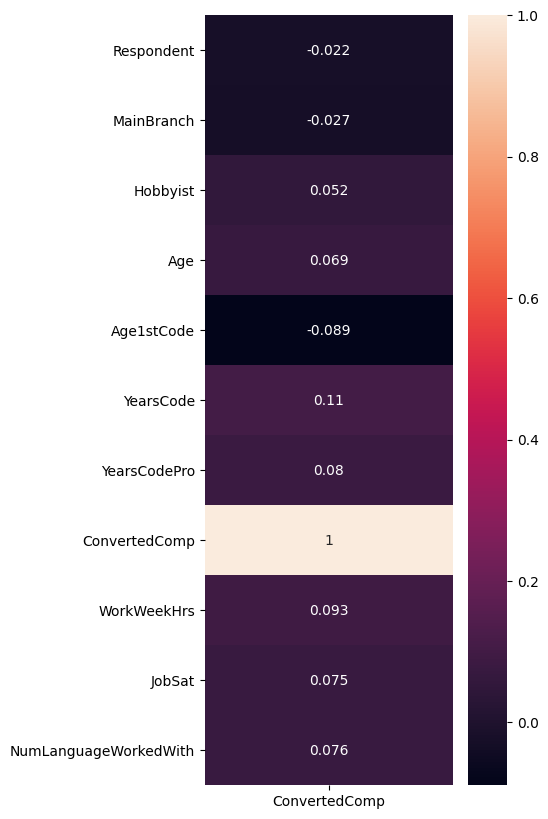

In [262]:
# Visualize using corr() Method of DataFrame and  heatmap() method of Seaborn 

fig = plt.figure(figsize=(4, 10))
sns.heatmap(dataset.corr()[['ConvertedComp']], annot=True)

# EDA

# Categorical EDA

In [263]:
# show the Top 5 values for each columns

columns = dataset.select_dtypes(include=['object', 'category']).columns
for col in columns:
    if(col != "Sexuality"):
        print("Top 5 values for " + col)
        print(dataset[col].value_counts().reset_index().rename(columns={"index": col, col: "Count"})[
              :min(5, len(dataset[col].value_counts()))])
        print(" ")
        print(" ")

Top 5 values for Gender
  Gender  Count
0    Man   1152
1  Woman     41
 
 
Top 5 values for DevType
                                             DevType  Count
0                              Developer, full-stack     87
1  Developer, back-end;Developer, front-end;Devel...     44
2                                Developer, back-end     40
3          Developer, back-end;Developer, full-stack     28
4  Developer, back-end;Developer, desktop or ente...     19
 
 
Top 5 values for EdLevel
                                             EdLevel  Count
0       Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)    626
1    Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)    307
2  Some college/university study without earning ...    178
3                Associate degree (A.A., A.S., etc.)     40
4         Other doctoral degree (Ph.D., Ed.D., etc.)     23
 
 
Top 5 values for UndergradMajor
                                      UndergradMajor  Count
0  Computer science, computer engineering, or sof...  

# EDA- Histogram

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2e10132610>]],
      dtype=object)

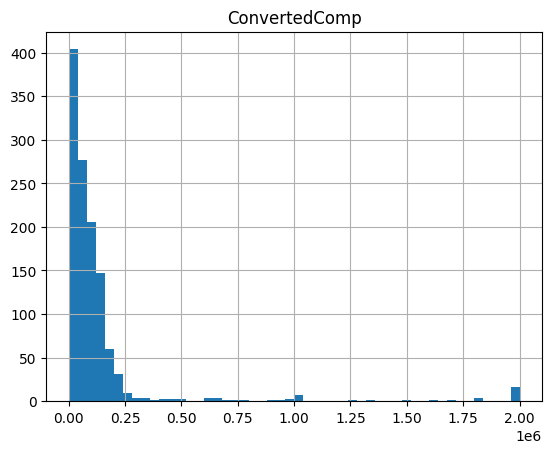

In [264]:
dataset.hist(column="ConvertedComp",bins=50)

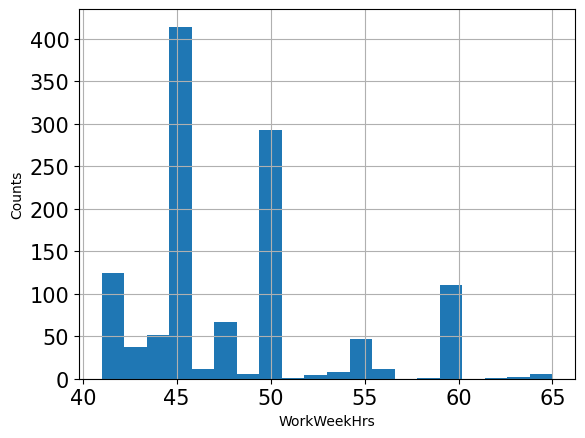

In [265]:
import matplotlib.pyplot as plt
plt.figure()
dataset['WorkWeekHrs'].plot(kind='hist',grid=True, bins=20,fontsize=15) 
plt.xlabel('WorkWeekHrs')
plt.ylabel('Counts')
plt.show()

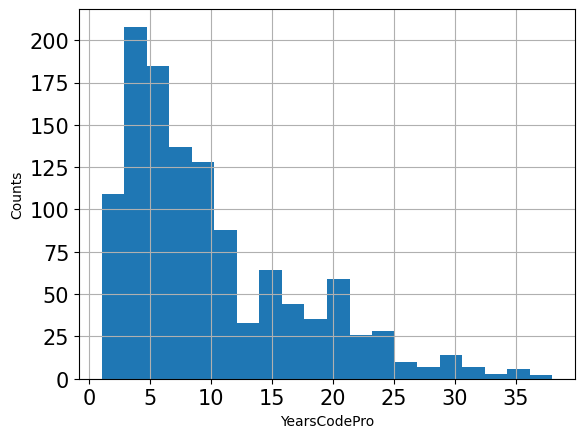

In [266]:
plt.figure()
dataset['YearsCodePro'].plot(kind='hist',grid=True, bins=20,fontsize=15) 
plt.xlabel('YearsCodePro')
plt.ylabel('Counts')
plt.show()

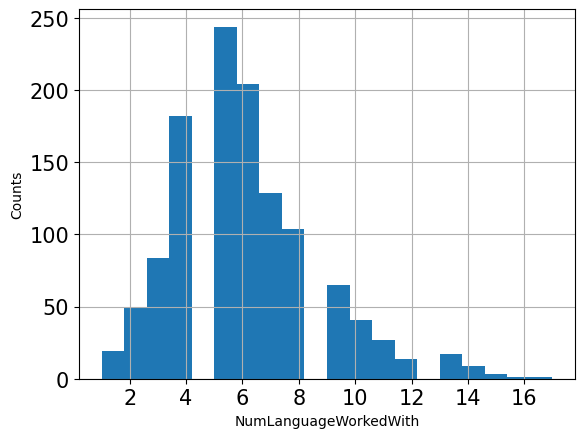

In [267]:
plt.figure()
dataset['NumLanguageWorkedWith'].plot(kind='hist',grid=True, bins=20,fontsize=15) 
plt.xlabel('NumLanguageWorkedWith')
plt.ylabel('Counts')
plt.show()

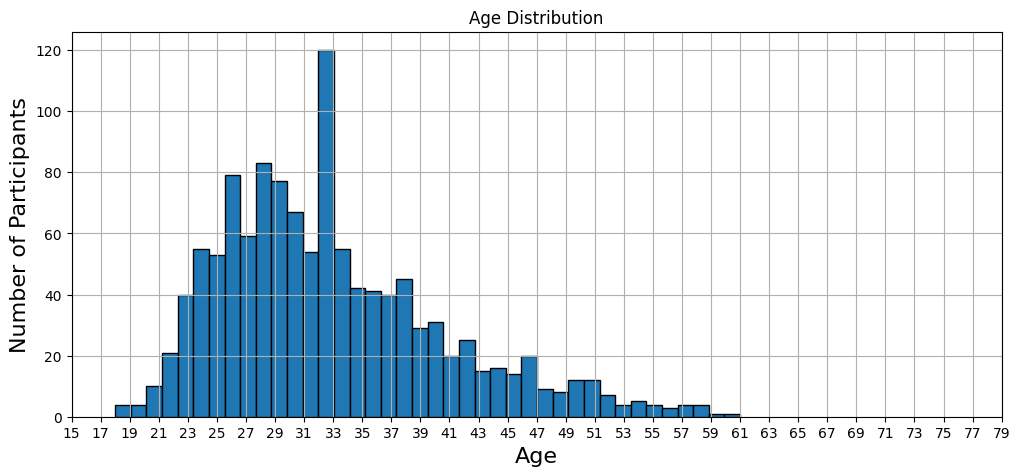

In [268]:
plt.subplots(figsize=(12,5))
dataset["Age"].hist(bins=40,edgecolor="black")
plt.xticks(list(range(15,80,2)))
plt.title("Age Distribution")
plt.ylabel("Number of Participants", fontsize=16)
plt.xlabel("Age", fontsize=16)
plt.show() 

--> The majority of respondants' age are between 22 to 50 years old.

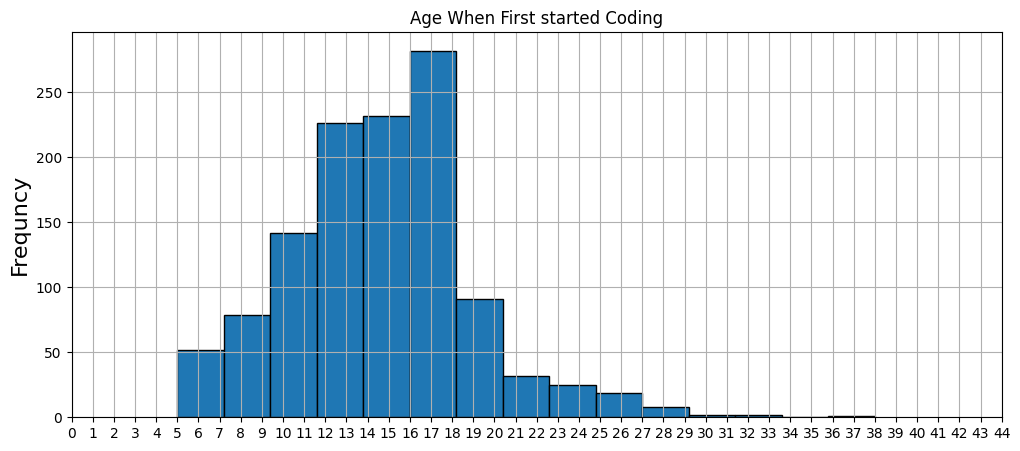

In [269]:
plt.subplots(figsize=(12,5))
dataset["Age1stCode"].hist(bins=15,edgecolor="black")
plt.xticks(list(range(0,45,1)))
plt.title("Age When First started Coding")
plt.ylabel("Frequncy", fontsize=16)
plt.show() 

--> The majority of 1st Code Age are between 10 to 19 years old.

# EDA - crosstab

In [270]:
salary_median = dataset['ConvertedComp'].median() 
y = dataset['ConvertedComp'].apply(lambda x:0 if x <= salary_median else 1)
dataset['Income'] = y 
dataset.head(20)

,Respondent,MainBranch,Hobbyist,Gender,Age,Age1stCode,YearsCode,YearsCodePro,DevType,EdLevel,UndergradMajor,ConvertedComp,WorkWeekHrs,Country,Ethnicity,LanguageDesireNextYear,NEWLearn,NEWOvertime,JobSat,NumLanguageWorkedWith,Income
117,119,2,1,Man,35.0,15,16,16,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",145000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Once every few years,Often: 1-2 days per week or more,4,11,1
168,170,2,1,Man,26.0,17,4,2,Data scientist or machine learning specialist;...,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",130000.0,45,United States,White or of European descent,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Every few months,Sometimes: 1-2 days per month but less than we...,4,6,1
198,200,2,0,Man,53.0,9,44,32,"Developer, back-end;Developer, desktop or ente...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",105000.0,44,United States,White or of European descent,C#;C++;Go;HTML/CSS;JavaScript;Kotlin;Objective...,Once a year,Occasionally: 1-2 days per quarter but less th...,4,6,1
240,242,2,1,Man,37.0,11,22,3,"Developer, back-end;Developer, front-end;Devel...","Professional degree (JD, MD, etc.)","A social science (such as anthropology, psycho...",87552.0,42,Israel,Middle Eastern,JavaScript;Python;Ruby,Every few months,Occasionally: 1-2 days per quarter but less th...,4,3,1
260,262,2,1,Man,37.0,10,10,10,Data or business analyst;Data scientist or mac...,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",171000.0,45,United States,White or of European descent,Bash/Shell/PowerShell;Go;JavaScript;Python;SQL,Once every few years,Sometimes: 1-2 days per month but less than we...,4,6,1
282,284,2,1,Man,28.0,18,7,3,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",27888.0,45,Greece,White or of European descent,Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScr...,Once a year,Sometimes: 1-2 days per month but less than we...,4,6,0
305,307,2,1,Man,41.0,14,24,19,"Developer, full-stack","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",648588.0,45,Ireland,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,4,5,1
431,433,2,1,Man,24.0,12,11,3,"Developer, front-end;Developer, full-stack;Dev...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",9564.0,50,Sri Lanka,South Asian,Go;Kotlin,Once a year,Sometimes: 1-2 days per month but less than we...,3,13,0
461,463,2,1,Man,43.0,15,28,20,"Database administrator;Developer, back-end;Dev...","Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",154000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,Once a year,Often: 1-2 days per week or more,3,7,1
485,487,2,1,Man,34.0,10,24,13,"Developer, back-end;Developer, front-end;Devel...","Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",84019.0,45,United Kingdom,White or of European descent,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,Once a year,Often: 1-2 days per week or more,1,6,1


[[29583.331615120274, 225527.79649122807], [29101.533333333333, 161353.57692307694]]
crosstab for numerical features:
                Man          Woman
Low    29583.331615   29101.533333
High  225527.796491  161353.576923


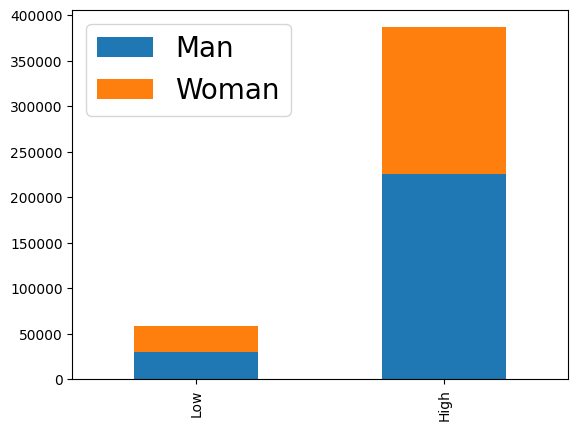

In [271]:
genders = dataset['Gender'].drop_duplicates()
incomes = np.zeros(len(dataset['Income'].drop_duplicates()))
my_test = [];
for num, gender in enumerate(genders):
    filter0 = (dataset['Gender'] == gender) & (dataset['Income'] == 0)
    filter1 = (dataset['Gender'] == gender) & (dataset['Income'] == 1)
    values0 = dataset[filter0].loc[:, 'ConvertedComp']
    values1 = dataset[filter1].loc[:, 'ConvertedComp']
    my_test.append([values0.mean(), values1.mean()])
    
print(my_test)
    
my_test = np.transpose(np.asarray(my_test))
my_test = pd.DataFrame(data=my_test, columns=['Man','Woman'], index=['Low','High']) 
print('crosstab for numerical features:')
print(my_test)
#fig, ax = plt.subplots(figsize=(10,7))  
my_test.plot.bar(stacked=True)
plt.show()

# EDA - Pie Chart

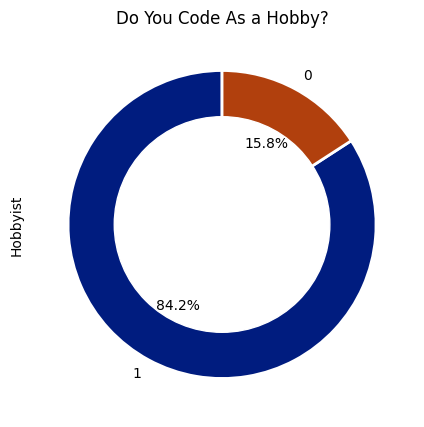

In [272]:
plt.subplots(figsize=(5,5))
data=dataset["Hobbyist"]
data.value_counts().plot.pie(autopct='%1.1f%%',colors=sns.color_palette("dark",5),startangle=90,wedgeprops = { "linewidth" : 2, "edgecolor" : "white"})
plt.title("Do You Code As a Hobby?")
my_circle=plt.Circle((0,0), 0.7, color="white")
p=plt.gcf()
p.gca().add_artist(my_circle)
plt.show()

* --> Most respondants do coding as a hobby. 

# EDA - Barplot  

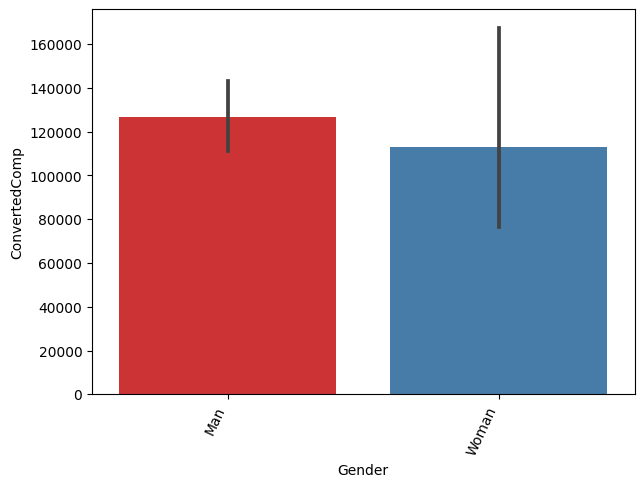

In [273]:
plt.figure(figsize=(7,5))
chart = sns.barplot(
    data=dataset,
    x="Gender",
    y="ConvertedComp",
    palette="Set1"
)
chart=chart.set_xticklabels(
    chart.get_xticklabels(), 
    rotation=65, 
    horizontalalignment="right" 
)

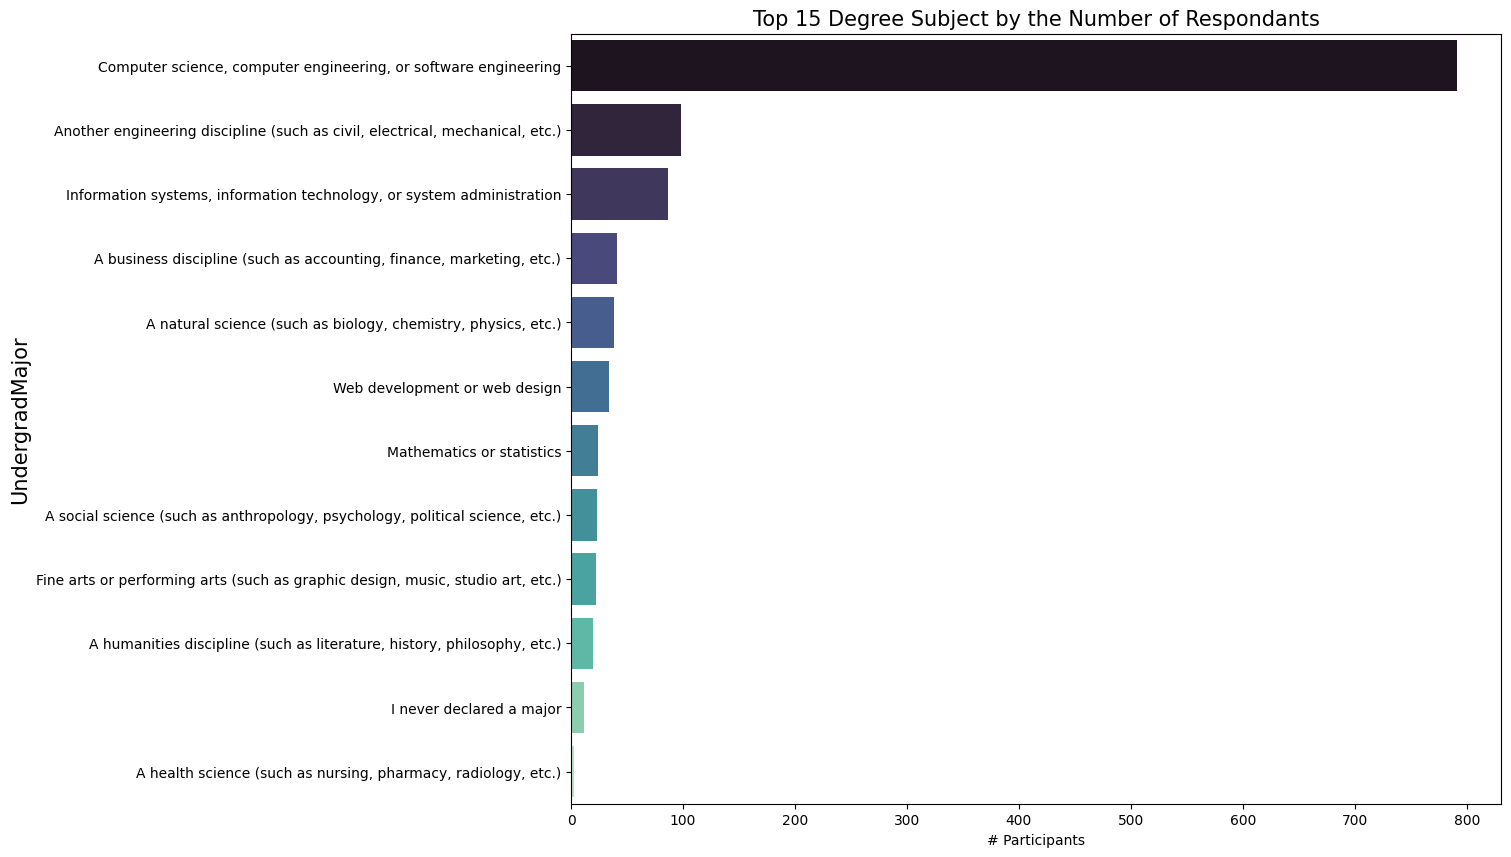

In [274]:
plt.subplots(figsize=(12,10))
coun_deg=dataset["UndergradMajor"].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun_deg.UndergradMajor,coun_deg.index,palette="mako")
plt.title("Top 15 Degree Subject by the Number of Respondants",size=15)
plt.xlabel("# Participants", size=10)
plt.ylabel("UndergradMajor", fontsize=15)
plt.show() 

--> We can see the majority have studied a computer science or a computer-related degree for undergrad major. 

In [275]:
sal_ed=dataset.groupby("UndergradMajor")["ConvertedComp"].median().to_frame().sort_values(by="ConvertedComp",ascending=False).head(20)


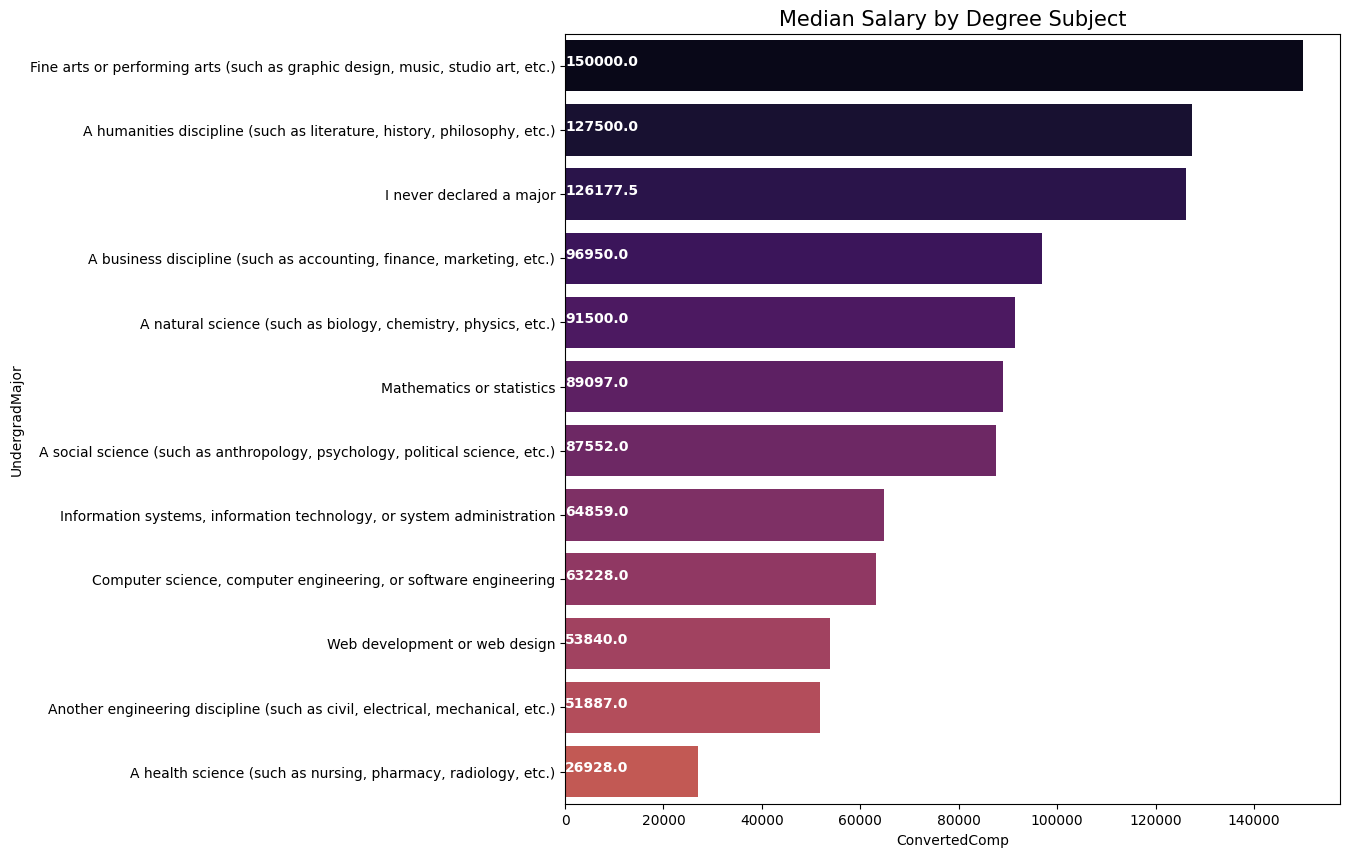

In [276]:
ax=sns.barplot(sal_ed.ConvertedComp,sal_ed.index,palette=sns.color_palette("inferno",20))
plt.title("Median Salary by Degree Subject",size=15)
for i, v in enumerate(sal_ed.ConvertedComp): 
    ax.text(.5, i, v,fontsize=10,color="white",weight="bold")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Regions & Ethnicties

To see Top 15 Countries by Respondents' count 

-->  Most people who took this survey belong to USA and UK and Germany, India, Brazil

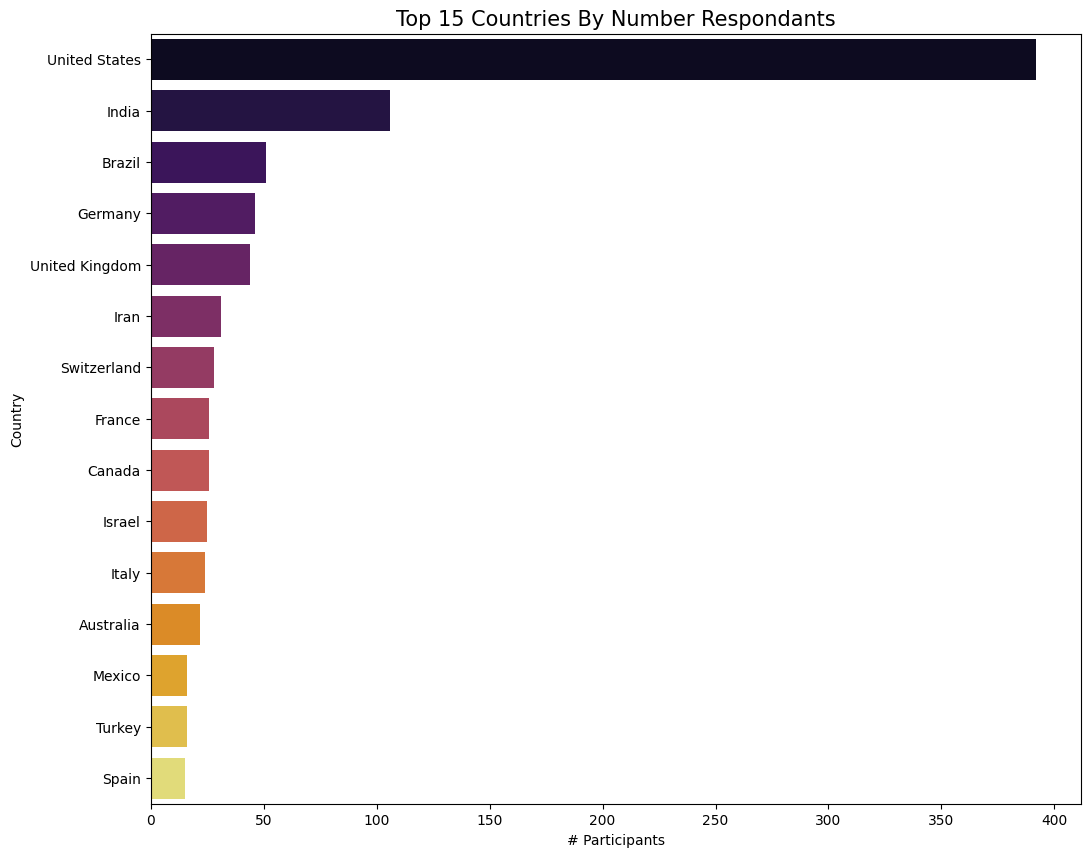

In [277]:
plt.subplots(figsize=(12,10))
coun=dataset["Country"].value_counts()[:15].sort_values(ascending=False).to_frame()
sns.barplot(coun.Country,coun.index,palette='inferno')
plt.title("Top 15 Countries By Number Respondants",size=15)
plt.ylabel("Country", size=10)
plt.xlabel("# Participants", size=10)
plt.show()

To see Top 10 Ethnicities

--> Most of people who took this survey are White or European descent and next percentage is South Asian people.

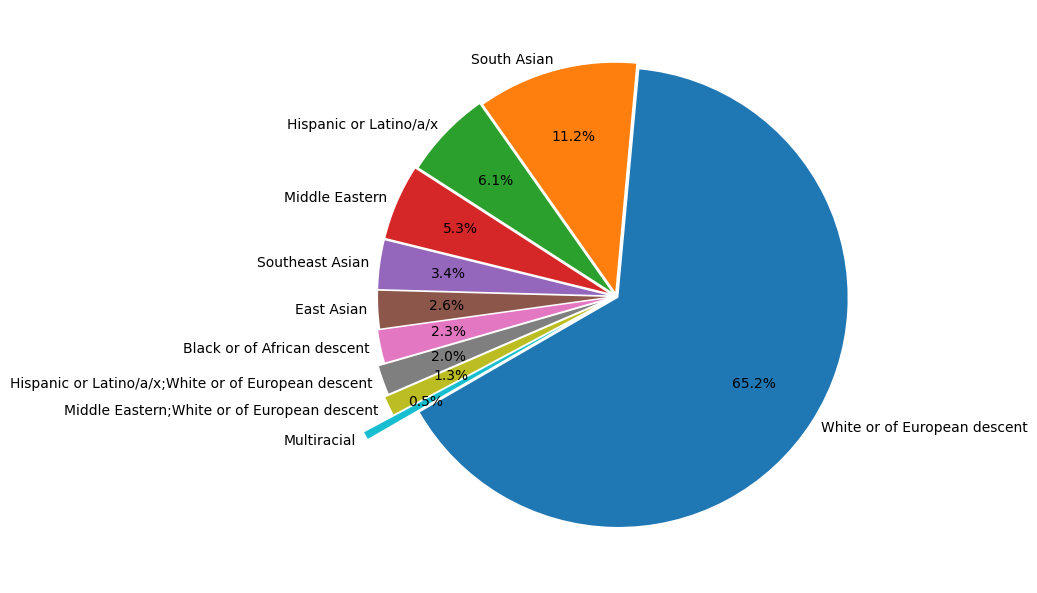

In [278]:
df_Ethnicity = dataset.groupby(['Ethnicity']).count().sort_values('Respondent', ascending=False)
races = [str(x) for x in df_Ethnicity.index[0:10]]
pies = [df_Ethnicity.Respondent[df_Ethnicity.index==races[x]][0] for x in range(10)]

fig, ax = plt.subplots(figsize=(10,10))
ax.pie(
    pies,
    labels=races,
    autopct='%.1f%%',
    explode=[0.01, 0.02, 0.03, 0.04, 0.04, 0.04, 0.05, 0.08, 0.1, 0.25],
    startangle=-150, pctdistance=0.7, labeldistance=1.05
)

fig.tight_layout()

plt.show()
plt.style.use('default')

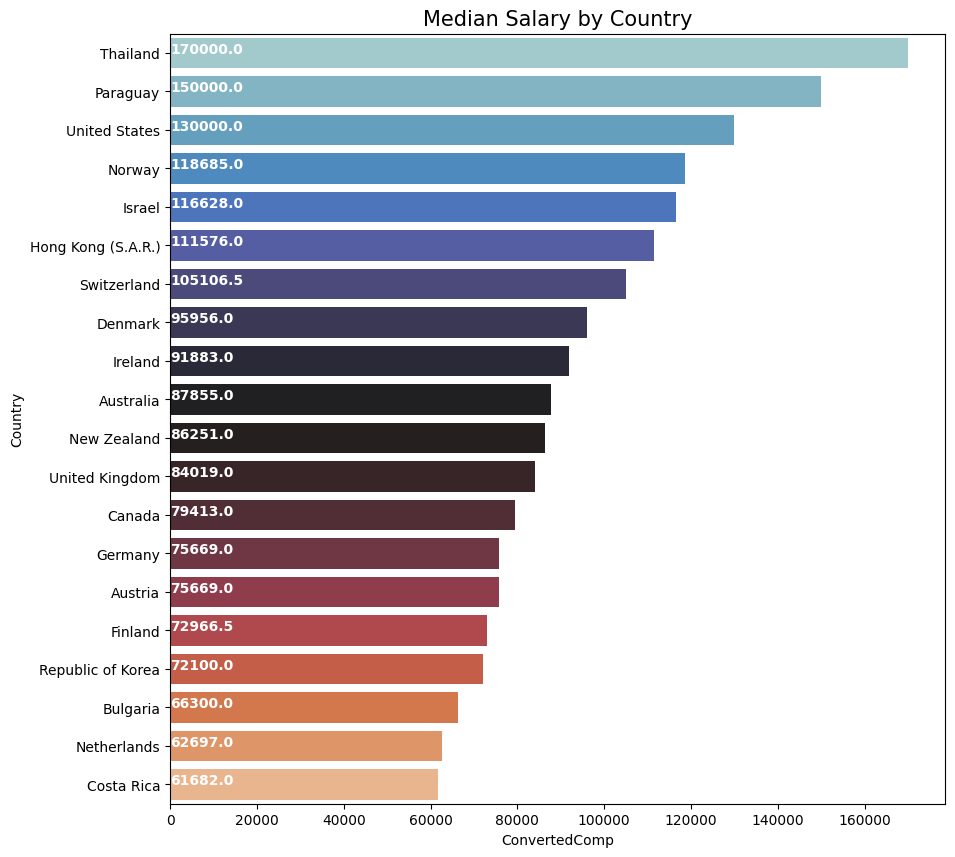

In [279]:
#salary=dataset[["ConvertedComp","Gender","Country","MainBranch","UndergradMajor","EdLevel"]].dropna()
sal_job=dataset.groupby("Country")["ConvertedComp"].median().to_frame().sort_values(by="ConvertedComp",ascending=False).head(20)
ax=sns.barplot(sal_job.ConvertedComp,sal_job.index,palette=sns.color_palette("icefire",20))
plt.title("Median Salary by Country",size=15)
for i, v in enumerate(sal_job.ConvertedComp): 
    ax.text(.5, i, v,fontsize=10,color="white",weight="bold")
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Developer Type

In [280]:
dataset["DevType"].value_counts()

Developer, full-stack                                                                                                                                                                            87
Developer, back-end;Developer, front-end;Developer, full-stack                                                                                                                                   44
Developer, back-end                                                                                                                                                                              40
Developer, back-end;Developer, full-stack                                                                                                                                                        28
Developer, back-end;Developer, desktop or enterprise applications;Developer, full-stack                                                                                                          19
                    

In [281]:
dataset["DevType"] = dataset["DevType"].str.split(',').str[0]
dataset["DevType"].value_counts().head(20)

Developer                                                                                                  701
Database administrator;Developer                                                                           115
Designer;Developer                                                                                          73
Database administrator;Designer;Developer                                                                   36
Data scientist or machine learning specialist;Developer                                                     33
Academic researcher;Developer                                                                               30
Data or business analyst;Database administrator;Developer                                                   21
Data or business analyst;Developer                                                                          20
Engineering manager                                                                                         16
D

In [282]:
dataset["DevType"] = dataset["DevType"].str.split(";").str[0]
dataset["DevType"].value_counts().head(20)

Developer                                        701
Database administrator                           155
Data or business analyst                         100
Designer                                          75
Academic researcher                               73
Data scientist or machine learning specialist     52
Engineering manager                               17
DevOps specialist                                  7
Senior executive/VP                                6
Engineer                                           5
Product manager                                    2
Name: DevType, dtype: int64

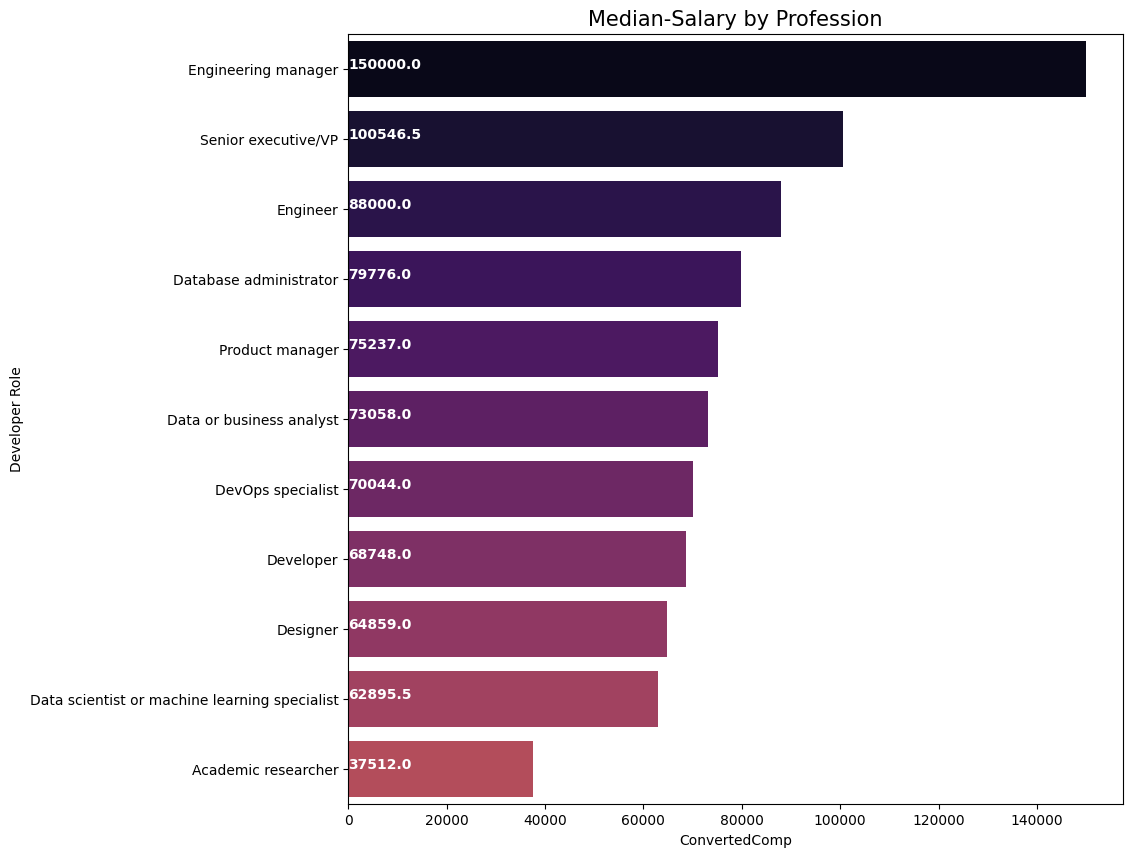

In [283]:
sal_job=dataset.groupby("DevType")["ConvertedComp"].median().to_frame().sort_values(by="ConvertedComp",ascending=False).head(20)
ax=sns.barplot(sal_job.ConvertedComp,sal_job.index,palette=sns.color_palette('inferno',20))
plt.title("Median-Salary by Profession",size=15)
plt.ylabel("Developer Role")
for i, v in enumerate(sal_job.ConvertedComp): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Education Level

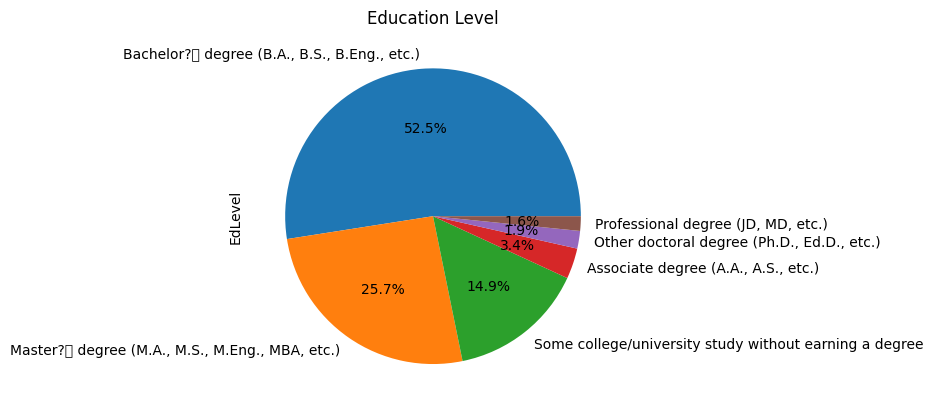

In [284]:
dataset['EdLevel'].value_counts().plot(kind = 'pie', title='Education Level', autopct='%1.1f%%')

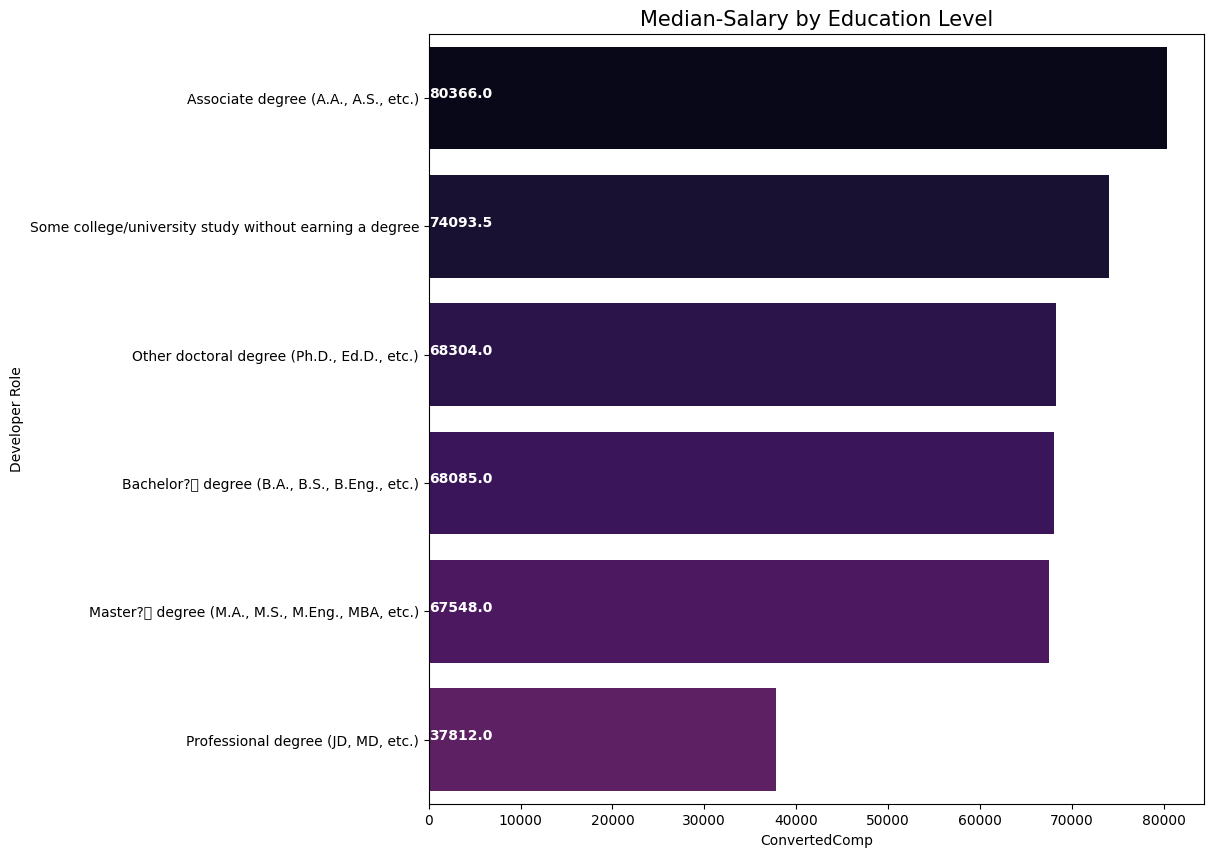

In [285]:
sal_ed=dataset.groupby("EdLevel")["ConvertedComp"].median().to_frame().sort_values(by="ConvertedComp",ascending=False).head(20)
ax=sns.barplot(sal_ed.ConvertedComp,sal_ed.index,palette=sns.color_palette("inferno",20))
plt.title("Median-Salary by Education Level",size=15)
plt.ylabel("Developer Role")
for i, v in enumerate(sal_ed.ConvertedComp): 
    ax.text(.5, i, v,fontsize=10,color='white',weight='bold')
fig=plt.gcf()
fig.set_size_inches(10,10)
plt.show()

# Name ConvrtedComp for Income, and split Income into 1, 0 (1 for high income, 0 for low income)

In [286]:
# Salary_median
salary_median = dataset['ConvertedComp'].median()

# 1: for High Income / 0: for Low Income
y = dataset['ConvertedComp'].apply(lambda x: 0 if x <= salary_median else 1)

dataset['Income'] = y

dataset.head(10)

,Respondent,MainBranch,Hobbyist,Gender,Age,Age1stCode,YearsCode,YearsCodePro,DevType,EdLevel,UndergradMajor,ConvertedComp,WorkWeekHrs,Country,Ethnicity,LanguageDesireNextYear,NEWLearn,NEWOvertime,JobSat,NumLanguageWorkedWith,Income
117,119,2,1,Man,35.0,15,16,16,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",145000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;C#;HTML/CSS;Python;Rust;...,Once every few years,Often: 1-2 days per week or more,4,11,1
168,170,2,1,Man,26.0,17,4,2,Data scientist or machine learning specialist,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","A humanities discipline (such as literature, h...",130000.0,45,United States,White or of European descent,C#;HTML/CSS;JavaScript;PHP;Python;SQL;TypeScript,Every few months,Sometimes: 1-2 days per month but less than we...,4,6,1
198,200,2,0,Man,53.0,9,44,32,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",105000.0,44,United States,White or of European descent,C#;C++;Go;HTML/CSS;JavaScript;Kotlin;Objective...,Once a year,Occasionally: 1-2 days per quarter but less th...,4,6,1
240,242,2,1,Man,37.0,11,22,3,Developer,"Professional degree (JD, MD, etc.)","A social science (such as anthropology, psycho...",87552.0,42,Israel,Middle Eastern,JavaScript;Python;Ruby,Every few months,Occasionally: 1-2 days per quarter but less th...,4,3,1
260,262,2,1,Man,37.0,10,10,10,Data or business analyst,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","A social science (such as anthropology, psycho...",171000.0,45,United States,White or of European descent,Bash/Shell/PowerShell;Go;JavaScript;Python;SQL,Once every few years,Sometimes: 1-2 days per month but less than we...,4,6,1
282,284,2,1,Man,28.0,18,7,3,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",27888.0,45,Greece,White or of European descent,Bash/Shell/PowerShell;C;C++;Go;Haskell;JavaScr...,Once a year,Sometimes: 1-2 days per month but less than we...,4,6,0
305,307,2,1,Man,41.0,14,24,19,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Another engineering discipline (such as civil,...",648588.0,45,Ireland,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;SQL,Every few months,Sometimes: 1-2 days per month but less than we...,4,5,1
431,433,2,1,Man,24.0,12,11,3,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",9564.0,50,Sri Lanka,South Asian,Go;Kotlin,Once a year,Sometimes: 1-2 days per month but less than we...,3,13,0
461,463,2,1,Man,43.0,15,28,20,Database administrator,"Master?셲 degree (M.A., M.S., M.Eng., MBA, etc.)","Computer science, computer engineering, or sof...",154000.0,50,United States,White or of European descent,Bash/Shell/PowerShell;HTML/CSS;JavaScript;Kotl...,Once a year,Often: 1-2 days per week or more,3,7,1
485,487,2,1,Man,34.0,10,24,13,Developer,"Bachelor?셲 degree (B.A., B.S., B.Eng., etc.)","Computer science, computer engineering, or sof...",84019.0,45,United Kingdom,White or of European descent,C#;HTML/CSS;JavaScript;Python;SQL;TypeScript,Once a year,Often: 1-2 days per week or more,1,6,1


In [287]:
dataset["Income"].value_counts()

0    597
1    596
Name: Income, dtype: int64

In [288]:
# numpy_data = dataset.values
ConvertedComp = dataset['ConvertedComp'].values
print(ConvertedComp)

[145000. 130000. 105000. ...  33972. 102700.  95000.]


In [289]:
lowIncome = dataset[dataset["Income"] == 0]
highIncome = dataset[dataset["Income"] == 1]
print(lowIncome.columns)

Index(['Respondent', 'MainBranch', 'Hobbyist', 'Gender', 'Age', 'Age1stCode',
       'YearsCode', 'YearsCodePro', 'DevType', 'EdLevel', 'UndergradMajor',
       'ConvertedComp', 'WorkWeekHrs', 'Country', 'Ethnicity',
       'LanguageDesireNextYear', 'NEWLearn', 'NEWOvertime', 'JobSat',
       'NumLanguageWorkedWith', 'Income'],
      dtype='object')


In [290]:
# Select the columns 
'''column 6 : YearsCode  /  column 19 : NumLanguageWorkedWith'''
X_lowIncome =lowIncome.iloc[:, [6, 19]].values
X_highIncome =highIncome.iloc[:, [6, 19]].values
print(X_lowIncome[:,0].max())
print(X_lowIncome[:,1].max())

40
17


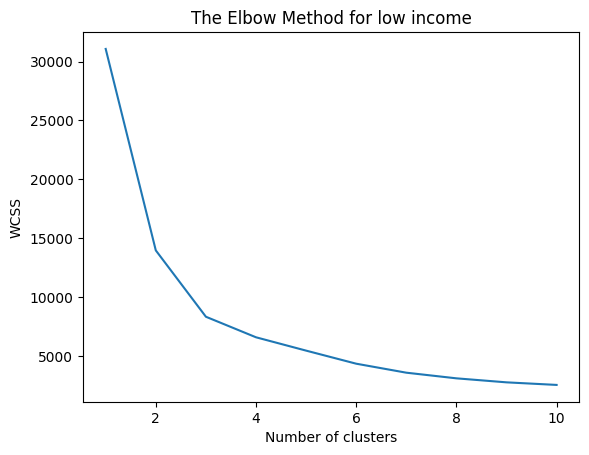

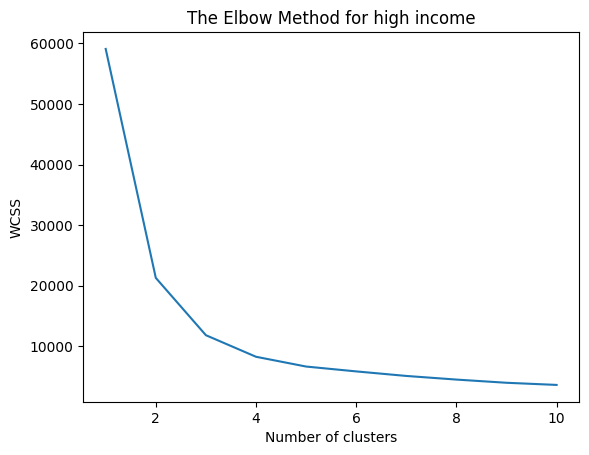

In [291]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_lowIncome)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for low income')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_highIncome)
    # print(kmeans.inertia_)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method for high income')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [292]:
# Fitting the data
kmeans_lowIncome = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_lowIncome = kmeans_lowIncome.fit_predict(X_lowIncome)

kmeans_highIncome = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans_highIncome = kmeans_highIncome.fit_predict(X_highIncome)

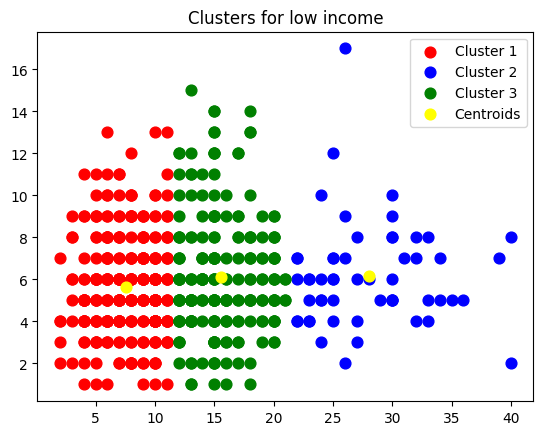

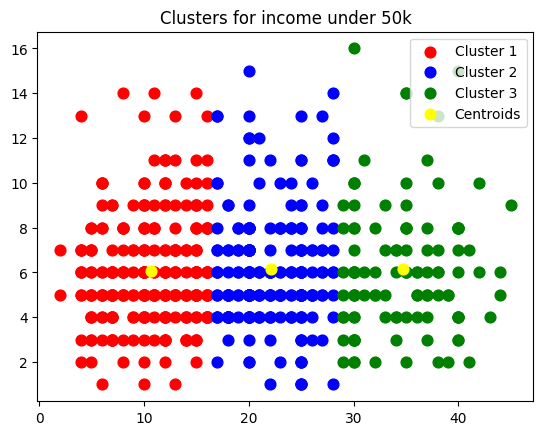

In [293]:
# Visualising the data
# xlabel : YearsCode / ylabel : NumLanguage
plt.scatter(X_lowIncome[y_kmeans_lowIncome == 0, 0], X_lowIncome[y_kmeans_lowIncome == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(X_lowIncome[y_kmeans_lowIncome == 1, 0], X_lowIncome[y_kmeans_lowIncome == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(X_lowIncome[y_kmeans_lowIncome == 2, 0], X_lowIncome[y_kmeans_lowIncome == 2, 1], s = 60, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_lowIncome.cluster_centers_[:, 0], kmeans_lowIncome.cluster_centers_[:, 1], s = 60, c = 'yellow', label = 'Centroids')
plt.title('Clusters for low income')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

plt.scatter(X_highIncome[y_kmeans_highIncome == 0, 0], X_highIncome[y_kmeans_highIncome == 0, 1], s = 60, c = 'red', label = 'Cluster 1')
plt.scatter(X_highIncome[y_kmeans_highIncome == 1, 0], X_highIncome[y_kmeans_highIncome == 1, 1], s = 60, c = 'blue', label = 'Cluster 2')
plt.scatter(X_highIncome[y_kmeans_highIncome == 2, 0], X_highIncome[y_kmeans_highIncome == 2, 1], s = 60, c = 'green', label = 'Cluster 3')
plt.scatter(kmeans_highIncome.cluster_centers_[:, 0], kmeans_highIncome.cluster_centers_[:, 1], s = 60, c = 'yellow', label = 'Centroids')
plt.title('Clusters for income under 50k')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()

In [294]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 2, random_state = 0).fit(ConvertedComp.reshape(-1,1))

import numpy as np
import matplotlib.pyplot as plt
print(kmeans.cluster_centers_)

[[  81900.26165803]
 [1587415.88571429]]


[   0    1    2 ... 1190 1191 1192]
[  29   82  111  114  130  151  165  204  206  264  272  351  354  424
  462  468  477  557  561  642  655  669  673  757  787  830  865  997
 1024 1027 1029 1058 1092 1095 1163]


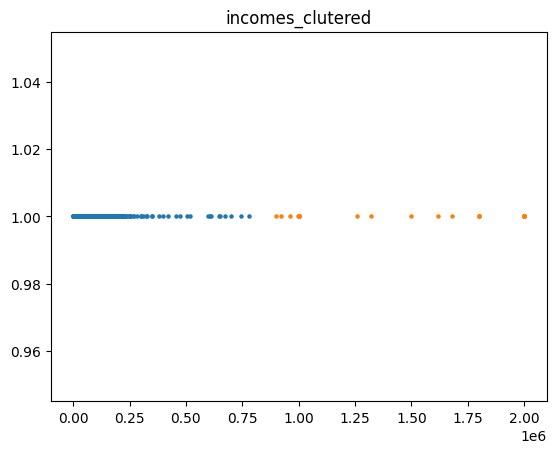

In [295]:
# Using K-Means clustering method

labels_1 = np.where(kmeans.labels_ == 0)
labels_2 = np.where(kmeans.labels_ == 1)

print(labels_1[0])
print(labels_2[0])

plt.scatter(ConvertedComp[labels_1], np.ones((len(ConvertedComp[labels_1]),)).tolist(), s = 5.0)
plt.scatter(ConvertedComp[labels_2], np.ones((len(ConvertedComp[labels_2]),)).tolist(), s = 5.0)
plt.title('incomes_clutered')
plt.show()

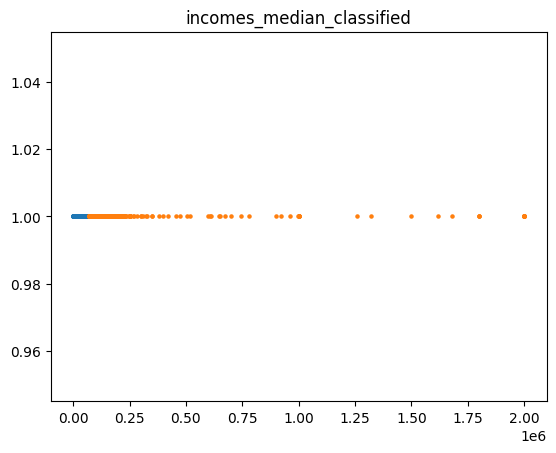

In [296]:
#The graph that classify to use thressholding of Data means

label_1 = np.where(y.values == 0)
label_2 = np.where(y.values == 1)

plt.scatter(ConvertedComp[label_1], np.ones((len(y.values[label_1]),)).tolist(), s = 5.0)
plt.scatter(ConvertedComp[label_2], np.ones((len(y.values[label_2]),)).tolist(), s = 5.0)
plt.title('incomes_median_classified')
plt.show()

In [297]:
dataset.shape

(1193, 21)

In [298]:
from sklearn.preprocessing import LabelEncoder
import copy
#'''numerical value로 전체 변환'''
le = LabelEncoder()
encoded_Series = dataset[dataset.columns[:]].apply(le.fit_transform)


data = copy.deepcopy(encoded_Series)
data_origin = copy.deepcopy(dataset.values)

'''Normalization of each column'''

for i in range(20):
  column = data.columns[i]
  data[column] = data[column]/data[column].max()

data = data.values

In [299]:
# low income high income 2 subset으로 나누기

incomes_1 = np.ones((1,20), dtype = 'object')
incomes_0 = np.ones((1,20), dtype = 'object')

incomes_1_origin = np.ones((1,20), dtype = 'object')
incomes_0_origin = np.ones((1,20), dtype = 'object')

for i in range(1193):

    if data[i, 20] == 1:
        incomes_1 = np.concatenate((incomes_1, data[i,:20].reshape(1,20)))
        incomes_1_origin = np.concatenate((incomes_1_origin, data_origin[i,:20].reshape(1,20)))

    else:
        incomes_0 = np.concatenate((incomes_0, data[i,:20].reshape(1,20)))
        incomes_0_origin = np.concatenate((incomes_0_origin, data_origin[i,:20].reshape(1,20)))




incomes_1 = np.delete(incomes_1,0,0)
incomes_0 = np.delete(incomes_0, 0,0)


incomes_1_origin = np.delete(incomes_1_origin,0,0)
incomes_0_origin = np.delete(incomes_0_origin, 0,0)


In [300]:
import seaborn as sns

# 2 subset 각각에 대한 kmeans clustering 수행

km = KMeans(n_clusters = 3)

df1 = pd.DataFrame(incomes_1)
df0 = pd.DataFrame(incomes_0)

df1_origin = pd.DataFrame(incomes_1_origin)
df0_origin = pd.DataFrame(incomes_0_origin)

y_predicted1 = km.fit_predict(df1)
y_predicted0 = km.fit_predict(df0)

df1_origin['cluster'] = y_predicted1
df0_origin['cluster'] = y_predicted0

print(y_predicted1)
print(y_predicted0)


df0.columns = encoded_Series.columns[:20]
df1.columns = encoded_Series.columns[:20]

df1['cluster'] = y_predicted1
df0['cluster'] = y_predicted0

df1['cluster'] = df1['cluster'].astype('float64')
df0['cluster'] = df0['cluster'].astype('float64')

# sns.pairplot(df0)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 0 0 0 1
 1 0 0 0 1 1 1 2 0 1 0 2 2 0 0 0 1 1 2 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 2 2 0 0 0 0 0 0 2 0 2 0 2 0 2 0 0 0 0 2 0 2 0 2 2 0 2 0 0 0 2 0 2 0 2 2 0
 0 2 0 2 0 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 0 0 0 0 2 2 2 2 0 0 0 0 0 0 2 0 2
 0 2 0 0 0 0 0 2 0 0 2 2 2 0 2 0 2 2 2 2 2 0 2 2 2 0 0 2 2 0 2 2 2 2 0 0 0
 2 2 2 0 0 0 2 2 0 0 0 2 2 2 2 0 0 2 0 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 0 2 2
 2 2 2 0 2 2 0 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 0 0 0 2 0 2 2 0 2 2 2
 2 0 2 2 0 2 2 0 2 0 2 0 

In [301]:
# Country 번호 알아보기 - 필요없는 코드

count1 = np.zeros((95,))

for i in range(95):
  count1[i] += np.where(df1['Country'].values == i+1)[0].shape[0]

print(count1)

count0 = np.zeros((95,))

for i in range(95):
  count0[i] += np.where(df0['Country'].values == i+1)[0].shape[0]

print(count0)
print(np.argmax(np.array(count0)) + 1)

encoded_Series['Country'].values.max()
encoded_Series['Country'].values.min()

count = np.zeros((95,))

for i in range(95):
  count[i] += np.where(encoded_Series['Country'].values == i+1)[0].shape[0]

print(count)

print(np.where(encoded_Series['Country'].values == 36))
print(dataset['Country'].values[9])

[  0.   1.   0.  19.   5.   0.   3.   0.   1.   0.  18.   0.   0.   1.
   1.   0.   0.   0.   0.   0.   2.   0.   0.   0.   0.   3.   7.   0.
  26.   0.   1.   0.   0.   2.   1.   7.   0.   0.   0.   4.  23.   3.
   0.   2.   0.   1.   0.   0.   0.   0.   0.   0.   0.   1.   0.   0.
   0.   6.   6.   0.   0.   6.   0.   0.   0.   1.   0.   0.   1.   0.
   1.   3.   0.   0.   2.   0.   3.   0.   3.   0.   0.   4.  26.   0.
   1.   0.   0.   0.   2.  27. 372.   0.   0.   0.   0.]
[ 1.  7.  1.  3.  2.  8. 10.  1. 50.  1.  8.  5.  4.  8.  1.  2.  1.  2.
  6.  1.  0.  2.  4.  2.  2.  1. 19.  2. 20.  1.  7.  1.  1.  1.  1. 99.
  7. 31.  1.  1.  2. 21.  2.  6.  1.  1.  3.  1.  1.  1.  4.  7.  1. 15.
  1.  2.  4.  9.  1.  1.  6.  0.  1. 14.  1.  0.  4.  4.  7.  9.  0.  8.
 11.  4.  7.  2.  8.  1. 12.  8.  1.  7.  2.  2.  0.  1. 16.  1.  5. 17.
 20.  4.  2.  1.  1.]
36
[  1.   8.   1.  22.   7.   8.  13.   1.  51.   1.  26.   5.   4.   9.
   2.   2.   1.   2.   6.   1.   2.   2.   4.   2.   2. 

'''kmeans parameter setting

1. euclidean distance 사용
2. seed개수(n_cluster) : 3
3. max_iter : 300회
4. n_init(Number of time the k-means algorithm will be run with defferent centroid seeds.) : 10회

discuss your choice of cluster number
- 각 subset에 주어진 데이터는 약 600개이다. 본 연구에서는 각각의 cluster마다 약 200개 정도의 데이터를 확보하고자 하여 n_cluster를 3으로 하였다.


'''

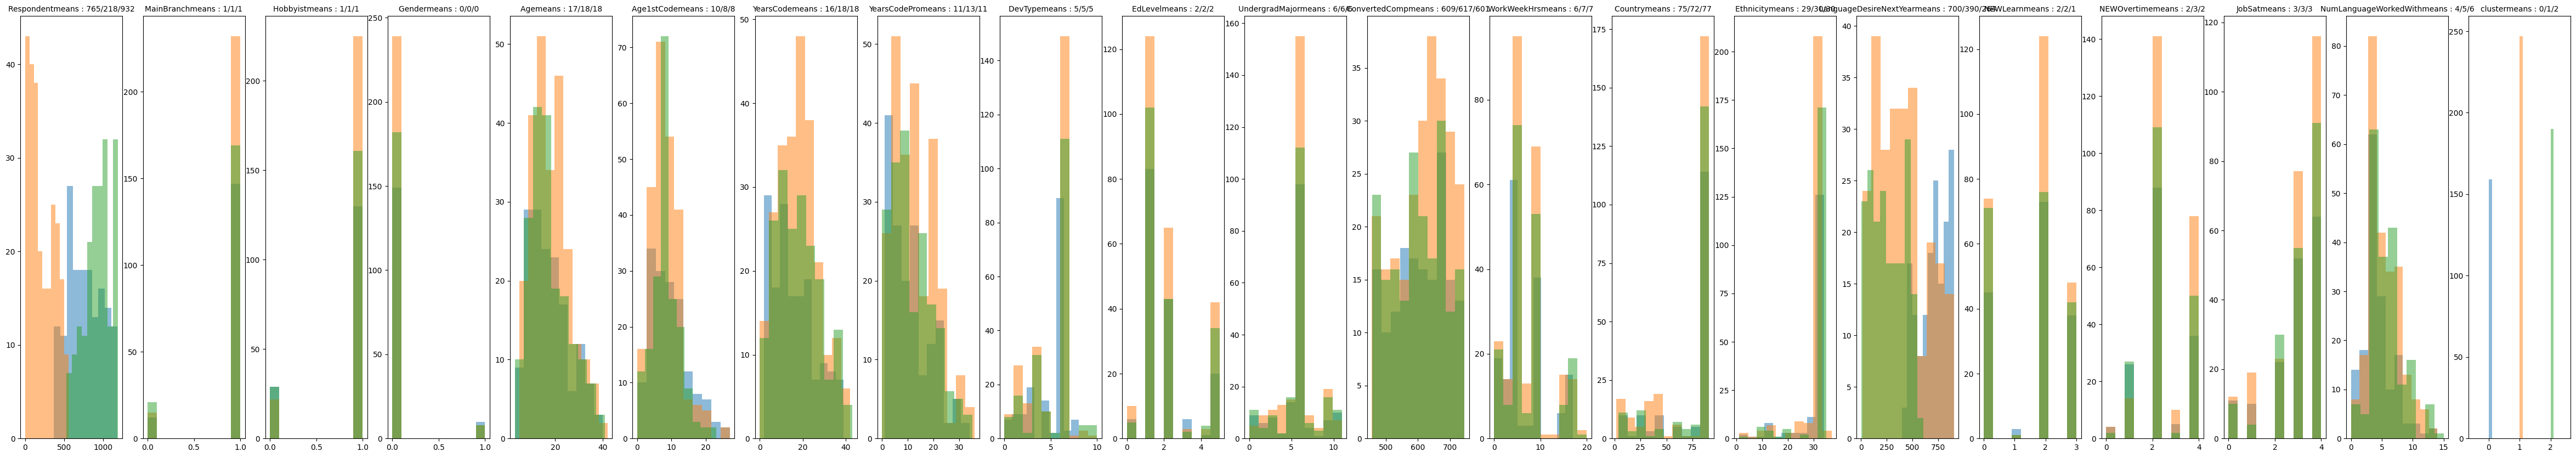

In [302]:
fig, axe = plt.subplots(1,21, figsize = (60,10))
for i in range(21):
  for j in [0.0, 1.0, 2.0]:

    d = df1['cluster'] == j
    d = df1[d]

    if j == 0.0:
      mean = str(round(d[d.columns[i]].mean()))
    else:
      mean = mean + '/' + str(round(d[d.columns[i]].mean()))

    axe[i].hist(d[d.columns[i]], alpha = 0.5)
    # axe[i].set_title(mean)
    # axe[i].axis('off')
    axe[i].set_title(d.columns[i] + 'means : '+ mean, fontsize = 10)

plt.show()

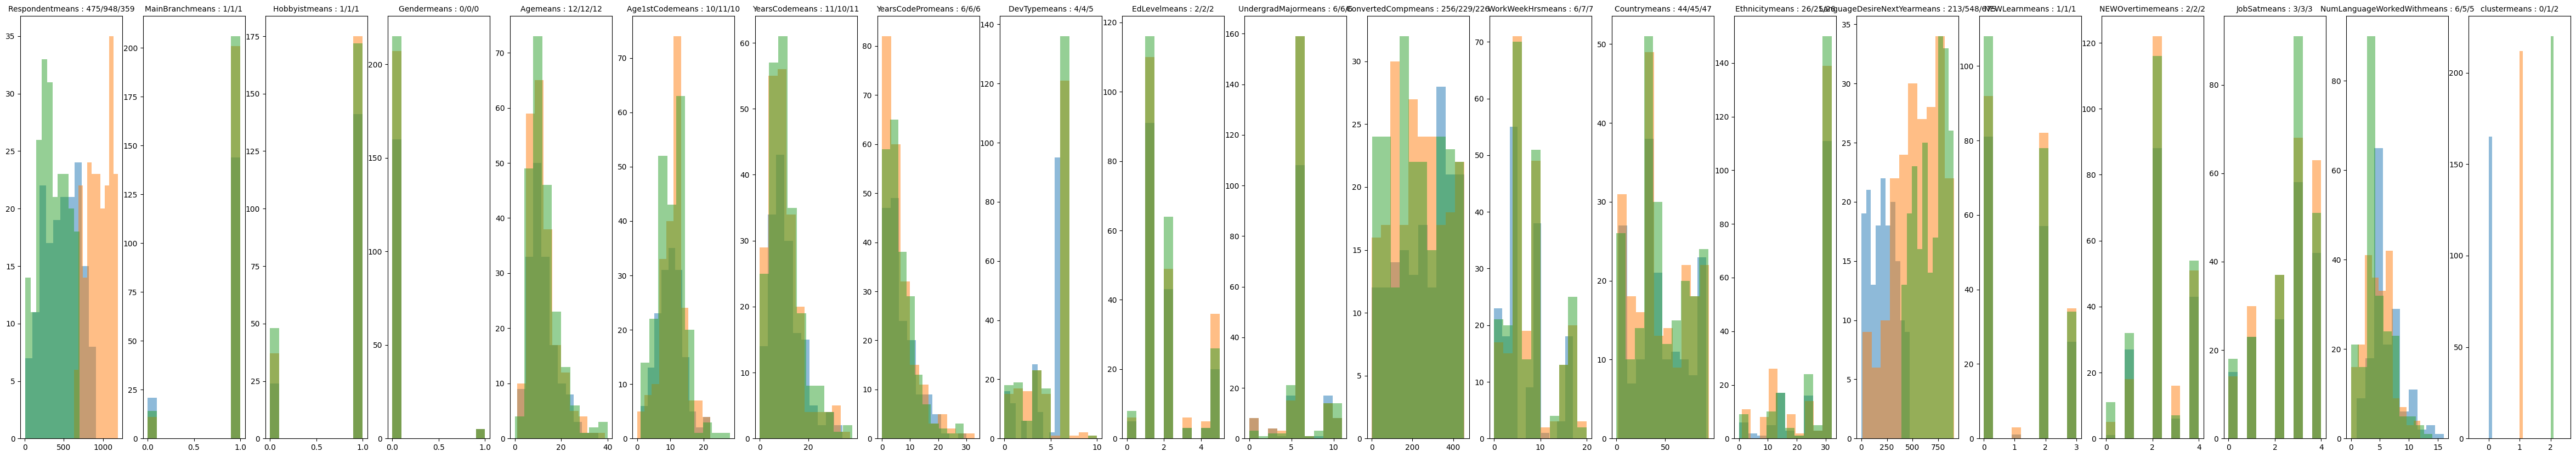

In [303]:
fig, axe = plt.subplots(1,21, figsize = (60,10))
for i in range(21):

  for j in [0.0, 1.0, 2.0]:
    d = df0['cluster'] == j
    d = df0[d]

    if j == 0.0:
      mean = str(round(d[d.columns[i]].mean()))
    else:
      mean = mean + '/' + str(round(d[d.columns[i]].mean()))

    axe[i].hist(d[d.columns[i]], alpha = 0.5)
    # axe[i].axis('off')
    axe[i].set_title(d.columns[i] + 'means : '+ mean, fontsize = 10)

plt.show()

In [ ]:
fig, axe = plt.subplots(2,21, figsize = (60,10))

for r in [0,1]:
  if r == 0 :
    df = df0
  else:
    df = df1

  for i in range(21):
    for j in [0.0, 1.0, 2.0]:

      d = df['cluster'] == j
      d = df[d]

      if j == 0.0:
        mean = str(round(d[d.columns[i]].mean()))
      else:
        mean = mean + '/' + str(round(d[d.columns[i]].mean()))

      if j == 0.0:
        color = 'r'
      elif j == 1.0:
        color = 'g'
      elif j == 2.0:
        color = 'b'

      axe[r,i].hist(d[d.columns[i]], alpha = 0.3, label = 'cluster' + str(j), color = color)
      # axe[i].set_title(mean)
      # axe[i].axis('off')
      axe[r,i].legend()
      axe[r,i].set_title(d.columns[i] + 'means : '+ mean, fontsize = 10)

plt.show()

##Classification - Logistic Regression

In [305]:
from sklearn.linear_model import LogisticRegression


model_LR = LogisticRegression(verbose = 1) 

le = LabelEncoder()
# dataset_numerical = dataset[dataset.columns[:]].apply(le.fit_transform)
# dataset_numerical

'''data : normalization한 데이터'''
features = data[:,1:20]
labels = data[:,20]

X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=1) 

model_LR.fit(X_train, Y_train)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s finished


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=1,
                   warm_start=False)

In [306]:
#모델 평가
print(model_LR.score(X_train, Y_train))
print(model_LR.score(X_test, Y_test))

0.9497005988023952
0.946927374301676


In [ ]:
# plot sigmoid

def sigmoid(x):
  a = []
  for itr in x:
    a.append(1/(1+np.exp(-itr)))

  return a

xs = np.linspace(-7.5,7.5,200)
sig = sigmoid(xs.tolist())

# prediction scatter plot
id_1 = np.where(Y_test == 1)[0].tolist()
id_0 = np.where(Y_test == 0)[0].tolist()


import math
predict = model_LR.predict(X_test)
prob = model_LR.predict_proba(X_test)

ids = np.argmax(prob, 1)

probs = []
for i in range(ids.shape[0]):
  p = prob[i,ids[i]]

  if ids[i] == 0:
    p = 1-p
  probs.append(p)
print(probs)

x_values = []
for i in range(ids.shape[0]):
  x = -math.log((1-probs[i])/probs[i])
  x_values.append(x)



x_values1, predict1, probs1 = np.array(x_values)[id_1], predict[id_1], np.array(probs)[id_1]
x_values0, predict0, probs0 = np.array(x_values)[id_0], predict[id_0], np.array(probs)[id_0]


plt.plot(xs, sig)
# plt.scatter(x_values, predict.tolist())
plt.scatter(x_values1, predict1, label = '1', s = 3)
plt.scatter(x_values0, predict0, label = '0', s = 3)
plt.legend()
plt.show()

plt.plot(xs, sig)
# plt.scatter(x_values, predict.tolist())
plt.scatter(x_values1, probs1, label = '1', s = 6)
plt.scatter(x_values0, probs0, label = '0', s = 6)
plt.legend()
plt.show()

In [308]:
import itertools
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    tick_marks=np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j], horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, auc


Y_pred = model_LR.predict(X_test)

confusion_mtx = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
# print(classification_report(Y_test,Y_pred))

confusion_mtx
sensitivity = confusion_mtx[1,1] / (confusion_mtx[1,1] + confusion_mtx[0,1])
specificity = confusion_mtx[0,0] / (confusion_mtx[0,0] + confusion_mtx[1,0])

print('accuracy : {:.4f} / sensitivity : {:.4f} / specificity : {:.4f}'.format(model_LR.score(X_test, Y_test), sensitivity, specificity))

In [ ]:
Y_probs = model_LR.predict_proba(X_test)
# print(Y_probs)

fpr , tpr , thresholds = roc_curve (Y_test, Y_probs[:,1])

auc_keras = auc(fpr, tpr)
fig=plt.figure(figsize=(10, 6))
plt.rc('legend', fontsize=10)
plt.plot(fpr, tpr,   marker = '.', label='AUC = {:.3f}'.format(auc_keras))
plt.plot([0, 1], [0, 1], 'k--',label='Reference line')
plt.xlim([0, 1])          
plt.ylim([0, 1])   
plt.xlabel('False positive rate',fontsize=10)
plt.ylabel('True positive rate',fontsize=10)
plt.title('Receiver Operating Characteristic Curve',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
Y_probs

## Artificial Neural Network

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(features, labels, test_size=0.3, random_state=1) 
print(X_train.shape)

from keras.models import Sequential
from keras.layers.core import Dense
from tensorflow.keras import optimizers
import tensorflow as tf

# 신경망 구축
model = Sequential()
model.add(Dense(40, input_dim = 19, activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(20, activation='relu'))
# model.add(Dense(10, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# optimizer 설정
opt = optimizers.Adam(learning_rate = 0.001)

# 모델 compile
model.compile(loss='BinaryCrossentropy',
              optimizer = opt,
              metrics = ['accuracy'])

model_path = '0423.h5'
callbacks_list = tf.keras.callbacks.ModelCheckpoint(filepath=model_path, monitor='val_accuracy', mode='max', save_best_only=True)

model.fit(X_train, Y_train, validation_data = (X_test, Y_test), epochs=150, batch_size = 16, callbacks = callbacks_list)

In [313]:
model.load_weights('0423.h5')
model.evaluate(X_test, Y_test)

12/12 [==============================] - 0s 1ms/step - loss: 0.1088 - accuracy: 0.9665


[0.1087590754032135, 0.9664804339408875]

              precision    recall  f1-score   support

           0       0.99      0.93      0.96       165
           1       0.95      0.99      0.97       193

    accuracy                           0.97       358
   macro avg       0.97      0.96      0.97       358
weighted avg       0.97      0.97      0.97       358



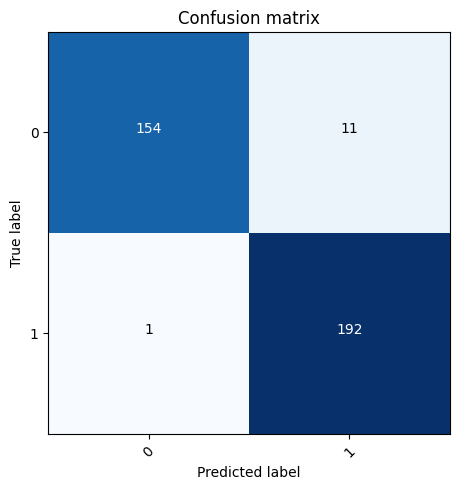

In [314]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, auc


Y_pred = model.predict(X_test)
Y_pred = np.round(Y_pred).squeeze()

confusion_mtx = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
print(classification_report(Y_test,Y_pred))


In [315]:
confusion_mtx
sensitivity = confusion_mtx[1,1] / (confusion_mtx[1,1] + confusion_mtx[0,1])
specificity = confusion_mtx[0,0] / (confusion_mtx[0,0] + confusion_mtx[1,0])

print('sensitivity : {:.4f} / specificity : {:.4f}'.format(sensitivity, specificity))

sensitivity : 0.9458 / specificity : 0.9935


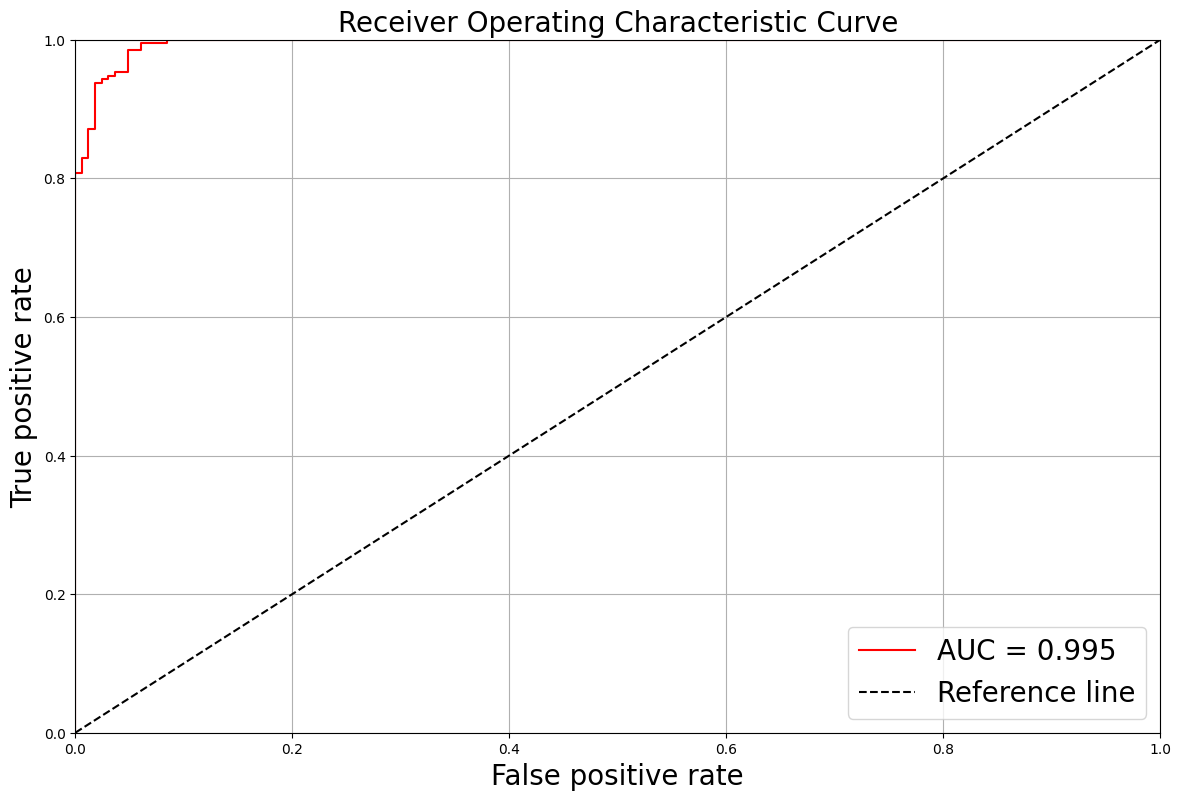

In [316]:
Y_probs = model.predict(X_test)
# print(Y_probs)

fpr , tpr , thresholds = roc_curve (Y_test, Y_probs)
auc_keras = auc(fpr, tpr)

fig=plt.figure(figsize=(14, 9))
plt.rc('legend', fontsize=20)
plt.plot(fpr, tpr, 'r',label='AUC = {:.3f}'.format(auc_keras))
plt.plot([0, 1], [0, 1], 'k--',label='Reference line')
plt.xlim([0, 1])          
plt.ylim([0, 1])   
plt.xlabel('False positive rate',fontsize=20)
plt.ylabel('True positive rate',fontsize=20)
plt.title('Receiver Operating Characteristic Curve',fontsize=20)
plt.legend(loc='best')
plt.grid()
plt.show()

## SVM

In [317]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
classifier = SVC(probability = True)

parameters = [
    {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
    { 'C': [1, 10, 100, 100], 'kernel': ['rbf'], 'gamma': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]}
]

grid_search = GridSearchCV(estimator = classifier, param_grid = parameters, scoring = 'accuracy', cv = 3, n_jobs = -1)

grid_search.fit(X_train, Y_train)
print(grid_search.best_params_)

{'C': 1, 'kernel': 'linear'}


accuracy : 0.9972 / sensitivity : 1.0000 / specificity : 0.9940


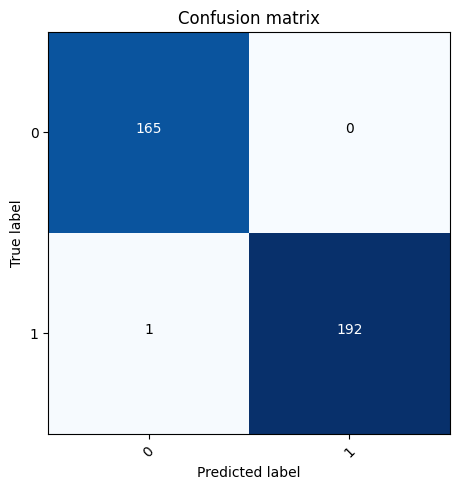

In [318]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score,roc_curve, auc


Y_pred = grid_search.predict(X_test)

confusion_mtx = confusion_matrix(Y_test, Y_pred)
plot_confusion_matrix(confusion_mtx, classes = range(2))
# print(classification_report(Y_test,Y_pred))

confusion_mtx
sensitivity = confusion_mtx[1,1] / (confusion_mtx[1,1] + confusion_mtx[0,1])
specificity = confusion_mtx[0,0] / (confusion_mtx[0,0] + confusion_mtx[1,0])

print('accuracy : {:.4f} / sensitivity : {:.4f} / specificity : {:.4f}'.format(grid_search.score(X_test, Y_test), sensitivity, specificity))

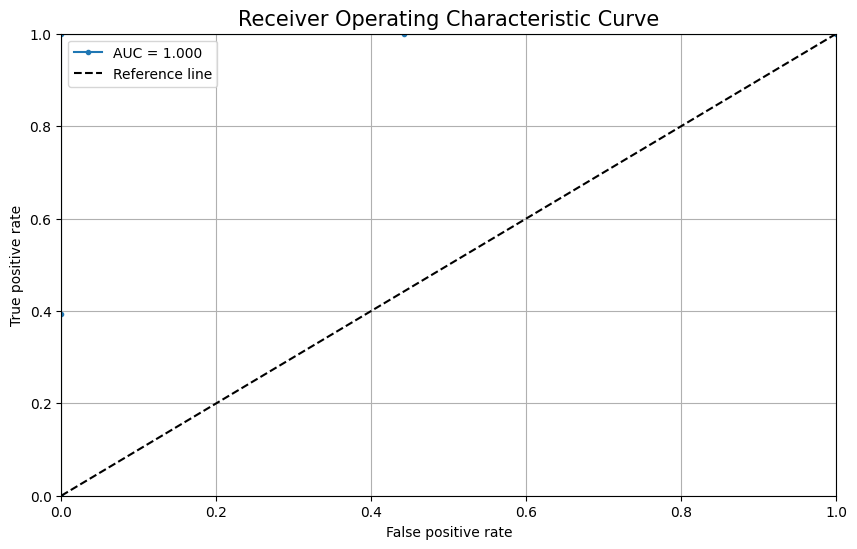

In [319]:
Y_probs = grid_search.predict_proba(X_test)
# print(Y_probs)

fpr , tpr , thresholds = roc_curve (Y_test, Y_probs[:,1])

auc_keras = auc(fpr, tpr)
fig=plt.figure(figsize=(10, 6))
plt.rc('legend', fontsize=10)
plt.plot(fpr, tpr,   marker = '.', label='AUC = {:.3f}'.format(auc_keras))
plt.plot([0, 1], [0, 1], 'k--',label='Reference line')
plt.xlim([0, 1])          
plt.ylim([0, 1])   
plt.xlabel('False positive rate',fontsize=10)
plt.ylabel('True positive rate',fontsize=10)
plt.title('Receiver Operating Characteristic Curve',fontsize=15)
plt.legend(loc='best')
plt.grid()
plt.show()

In [ ]:
grid_search.predict_proba(X_test)